<h1><strong><font color='green'>Machine Learning Models </font></strong></h1>

##Machine Learning Models



In [ ]:
import pandas as pd
import numpy as np
import warnings
import pickle
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import multilabel_confusion_matrix
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from lightgbm import LGBMClassifier

In [ ]:
X_train_final.head()

,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9,embed_10,embed_11,embed_12,embed_13,embed_14,embed_15,embed_16,embed_17,embed_18,embed_19,embed_20,embed_21,embed_22,embed_23,embed_24,embed_25,embed_26,embed_27,embed_28,embed_29,embed_30,embed_31,embed_32,embed_33,embed_34,embed_35,embed_36,embed_37,embed_38,embed_39,...,embed_266,embed_267,embed_268,embed_269,embed_270,embed_271,embed_272,embed_273,embed_274,embed_275,embed_276,embed_277,embed_278,embed_279,embed_280,embed_281,embed_282,embed_283,embed_284,embed_285,embed_286,embed_287,embed_288,embed_289,embed_290,embed_291,embed_292,embed_293,embed_294,embed_295,embed_296,embed_297,embed_298,embed_299,length_word_level,length_char_level,negative,neutral,positive,compound
0,-0.009333,-0.009356,0.002633,0.006967,-0.013550,-0.014861,0.005067,-0.053167,-0.007122,0.000278,-0.001617,-0.024556,0.015783,0.002889,-0.004711,-0.003144,0.044511,0.005694,0.026739,-0.010089,0.007406,0.009156,-0.013250,0.027911,0.004833,-0.002617,0.013944,0.004506,-0.013006,0.001056,-0.000056,0.000833,0.003433,0.000217,-0.001056,-0.015522,0.020317,0.002128,-0.008672,-0.002411,...,0.012161,0.017472,0.008639,0.006428,-0.023278,0.067217,-0.074872,-0.025189,0.040922,-0.028100,0.008728,0.003089,0.007861,-0.000217,-0.010350,0.003606,0.010578,-0.015889,0.006172,0.012561,0.001633,-0.021156,-0.000678,0.005872,0.001494,0.010056,-0.033167,-0.003444,0.004472,-0.005667,0.006339,-0.003083,0.005044,-0.008972,19,93,0.000,0.849,0.151,0.4939
1,0.001525,-0.013000,0.009075,-0.001850,-0.002775,-0.004325,0.003850,-0.066150,0.005813,0.012313,-0.016313,-0.033088,0.016775,0.005650,-0.013050,0.006050,0.041137,0.008450,0.034250,-0.003463,-0.005813,0.001825,-0.007662,0.024487,0.005338,-0.005162,0.013388,0.003425,0.012675,0.013888,-0.011550,0.015588,-0.001337,-0.010987,0.001713,-0.015063,0.018825,0.021212,-0.004763,-0.004563,...,0.001475,0.001850,0.004213,0.003388,-0.028225,0.061150,-0.074513,-0.015687,0.028925,-0.022475,-0.010012,0.011687,0.000887,-0.015787,-0.016988,-0.002600,0.006150,-0.004413,0.003425,0.001325,0.011112,-0.026013,0.004325,0.005212,0.000875,0.002025,-0.007250,0.005388,0.021425,-0.001775,0.016713,0.005450,0.002737,-0.024050,9,47,0.000,1.000,0.000,0.0000
2,-0.009713,0.006750,0.003400,0.040175,-0.018275,-0.016763,-0.005463,-0.065850,0.018400,0.015475,-0.003975,-0.006962,0.010275,0.012613,-0.012150,-0.018287,0.050312,0.003250,0.029150,0.007025,0.000325,-0.001562,-0.030975,0.027500,0.010125,0.008038,0.011212,-0.005150,-0.002025,0.000087,-0.010525,0.028938,-0.011800,0.005312,-0.000350,-0.014800,0.028000,0.016113,0.002537,-0.014950,...,-0.000350,0.008038,0.011050,0.011650,-0.015238,0.059787,-0.077138,-0.019250,0.015537,-0.019987,0.008800,-0.006562,0.004612,-0.012275,0.008812,0.008538,0.007600,-0.011062,-0.008412,0.011412,-0.008625,-0.018600,0.016987,0.008750,0.012100,0.004950,-0.035763,-0.012338,-0.002513,0.007750,0.034587,0.012063,0.004187,-0.024013,9,47,0.000,1.000,0.000,0.0000
3,-0.007250,0.018450,-0.000400,0.011750,-0.000400,-0.015900,-0.019350,-0.044850,0.017400,-0.006450,-0.015300,0.006850,0.009100,0.007350,-0.008550,-0.002700,0.072000,0.014950,0.030950,-0.005800,-0.011250,-0.015800,-0.022200,0.022800,-0.016600,0.004950,0.006000,0.007150,-0.000200,-0.009200,0.001650,0.024900,0.012050,0.013350,-0.003300,-0.004250,0.006050,0.024500,-0.000400,-0.008650,...,-0.012050,0.005450,-0.011750,0.015700,-0.008550,0.048650,-0.053600,-0.033900,0.009100,-0.017900,-0.006850,0.018750,-0.000450,-0.018100,-0.012050,-0.021300,0.004300,-0.016400,-0.001050,0.008800,0.004200,-0.021700,0.019400,0.012800,0.007900,0.001350,-0.033350,-0.005650,0.013350,0.002400,0.013500,0.007050,0.018750,-0.004250,4,24,0.000,1.000,0.000,0.0000
4,-0.014437,-0.014775,0.003625,0.012425,-0.021363,-0.003713,-0.006475,-0.052313,0.003038,0.009250,-0.012038,-0.011650,0.012837,0.000525,-0.007263,-0.004975,0.037962,-0.000300,0.033625,0.006888,0.000050,0.000700,-0.005487,0.025562,-0.009312,-0.008187,0.010438,-0.003325,0.003037,-0.006225,0.

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train_final.iloc[:,300:])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
def scaler_transform(train,cv,test):
  train.iloc[:,300:]=scaler.transform(train.iloc[:,300:])
  cv.iloc[:,300:]=scaler.transform(cv.iloc[:,300:])
  test.iloc[:,300:]=scaler.transform(test.iloc[:,300:])

In [ ]:
scaler_transform(X_train_final,X_cv_final,X_test_final)
scaler_transform(X_train_final_1,X_cv_final_1,X_test_final_1)
scaler_transform(X_train_final_2,X_cv_final_2,X_test_final_2)
scaler_transform(X_train_final_3,X_cv_final_3,X_test_final_3)

In [ ]:
def get_metrics(predictions):
  hamming_loss=metrics.hamming_loss(y_test,predictions)
  emr=metrics.accuracy_score(y_test, predictions)
  hamming_score=1-hamming_loss
  f1_micro=f1_score(y_test, predictions, average='micro')
  f1_macro=f1_score(y_test, predictions, average='macro')

  return hamming_loss,emr,hamming_score,f1_micro,f1_macro
results=pd.DataFrame(columns=['Model','Word Embeddings','F1-Macro'])

In [ ]:
def print_cf_matrix(cf_matrices):
  '''Function to print confusion Matrix'''
  fig, axes = plt.subplots(1, 3, sharex=True, figsize=(20,5))
  fig.suptitle('Confusion Matrices for all the three classes')
  classes=['Commenting', 'Ogling/Facial Expressions/Staring', 'Touching /Groping']
  for index,cf_matrix in enumerate(cf_matrices):
    group_names = ['TN','FP','FN','TP']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',ax=axes[index])
    axes[index].set_title('Confusion Matrix for class '+classes[index])

##<h2><strong>Using K-Nearest Neighbours</strong><h2>

Best params :  {'estimator__n_neighbors': 5, 'estimator__weights': 'distance'}
Exact match ratio : 0.4447
Hamming score : 0.7430
Micro F1-score : 0.5387
Macro F1-score : 0.5030



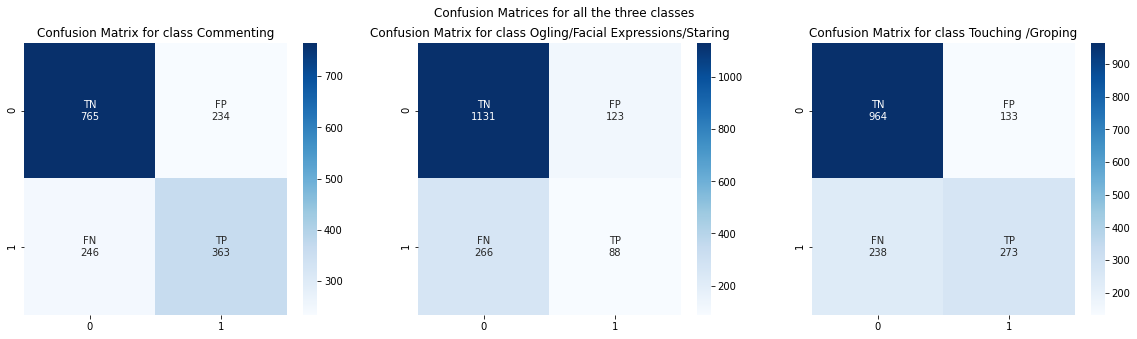

In [ ]:
clf = MultiOutputClassifier(KNeighborsClassifier())

param_grid={
    'estimator__n_neighbors':[3,5,7,10,15],
    'estimator__weights':['distance','uniform']
}
grid_clf_knn = GridSearchCV(clf,param_grid,scoring='f1_macro',n_jobs=-1)
grid_clf_knn.fit(pd.concat([X_train_final,X_cv_final]),pd.concat([y_train,y_cv]))

print('Best params : ',grid_clf_knn.best_params_)

clf_knn = grid_clf_knn.best_estimator_
predictions = clf_knn.predict (X_test_final)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['K-NN','Fasttext',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

Best params :  {'estimator__n_neighbors': 3, 'estimator__weights': 'distance'}
Exact match ratio : 0.3955
Hamming score : 0.7121
Micro F1-score : 0.5005
Macro F1-score : 0.4765



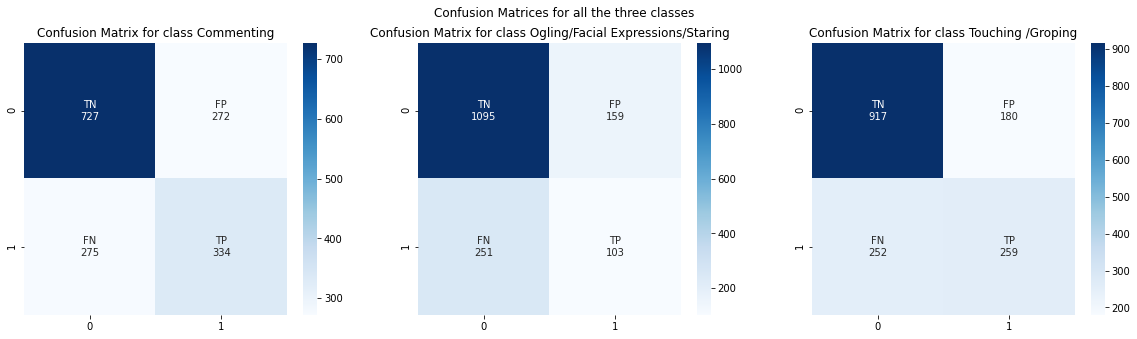

In [ ]:
clf = MultiOutputClassifier(KNeighborsClassifier())

param_grid={
    'estimator__n_neighbors':[3,5,7,10,15],
    'estimator__weights':['distance','uniform']
}
grid_clf_knn = GridSearchCV(clf,param_grid,scoring='f1_macro',n_jobs=-1)
grid_clf_knn.fit(pd.concat([X_train_final_1,X_cv_final_1]),pd.concat([y_train,y_cv]))

print('Best params : ',grid_clf_knn.best_params_)

clf_knn = grid_clf_knn.best_estimator_
predictions = clf_knn.predict (X_test_final_1)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['K-NN','Fasttext-tfidf',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

Best params :  {'estimator__n_neighbors': 10, 'estimator__weights': 'distance'}
Exact match ratio : 0.5044
Hamming score : 0.7730
Micro F1-score : 0.5900
Macro F1-score : 0.5573



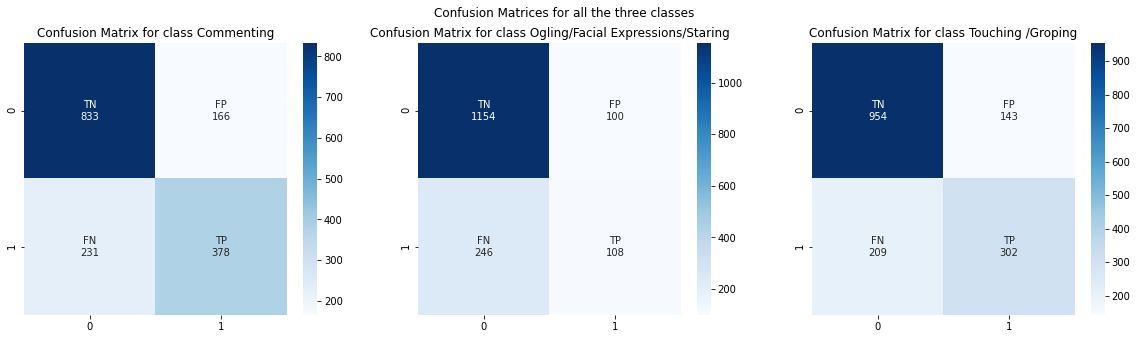

In [ ]:
clf = MultiOutputClassifier(KNeighborsClassifier())

param_grid={
    'estimator__n_neighbors':[3,5,7,10,15],
    'estimator__weights':['distance','uniform']
}
grid_clf_knn = GridSearchCV(clf,param_grid,scoring='f1_macro',n_jobs=-1)
grid_clf_knn.fit(pd.concat([X_train_final_2,X_cv_final_2]),pd.concat([y_train,y_cv]))

print('Best params : ',grid_clf_knn.best_params_)

clf_knn = grid_clf_knn.best_estimator_
predictions = clf_knn.predict (X_test_final_2)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['K-NN','Glove',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

Best params :  {'estimator__n_neighbors': 3, 'estimator__weights': 'distance'}
Exact match ratio : 0.4285
Hamming score : 0.7247
Micro F1-score : 0.5202
Macro F1-score : 0.4963



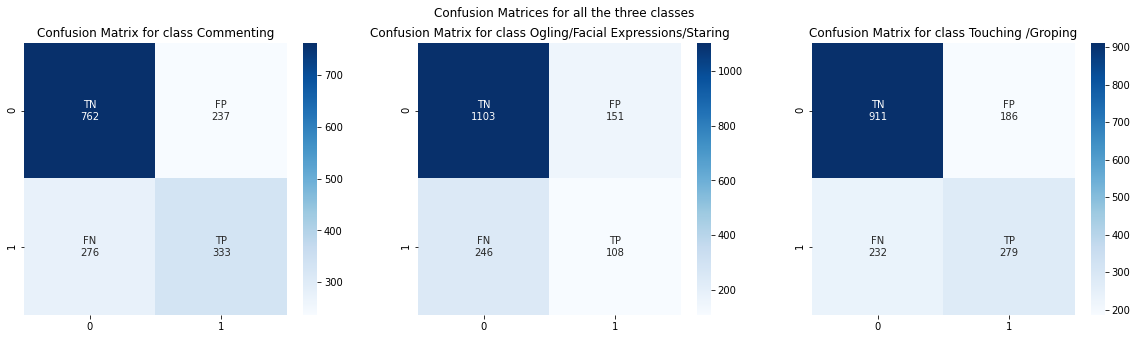

In [ ]:
clf = MultiOutputClassifier(KNeighborsClassifier())

param_grid={
    'estimator__n_neighbors':[3,5,7,10,15],
    'estimator__weights':['distance','uniform']
}
grid_clf_knn = GridSearchCV(clf,param_grid,scoring='f1_macro',n_jobs=-1)
grid_clf_knn.fit(pd.concat([X_train_final_3,X_cv_final_3]),pd.concat([y_train,y_cv]))

print('Best params : ',grid_clf_knn.best_params_)

clf_knn = grid_clf_knn.best_estimator_
predictions = clf_knn.predict (X_test_final_3)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['K-NN','Glove-tfidf',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

##<h2><strong>Using Logistic regression</strong><h2>

Best params :  {'estimator__alpha': 1e-05, 'estimator__penalty': 'l1'}
Exact match ratio : 0.5037
Hamming score : 0.7801
Micro F1-score : 0.6392
Macro F1-score : 0.6250



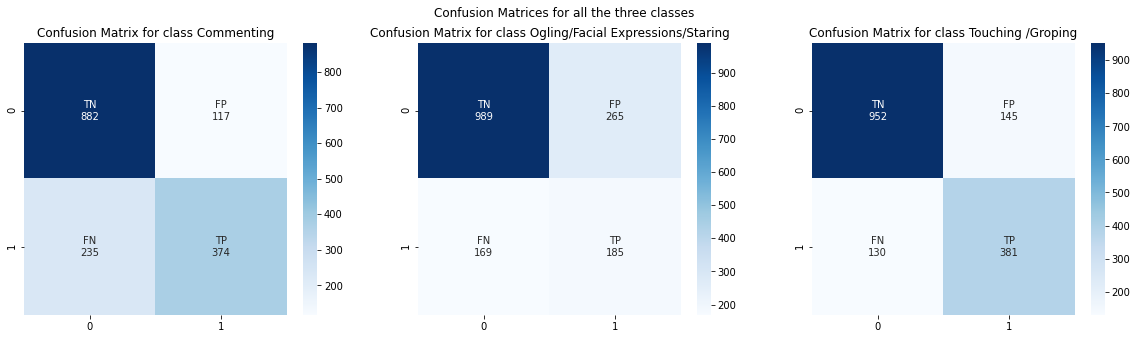

In [ ]:
clf = MultiOutputClassifier(SGDClassifier(loss='log',random_state=25,class_weight='balanced'))

param_grid={
    'estimator__alpha':[0.1,0.01,0.001,0.0001,0.00001,1e-06],
    'estimator__penalty':['l1','l2'] 
}
grid_clf_lr = GridSearchCV(clf,param_grid,scoring='f1_macro',cv=5,n_jobs=-1)
grid_clf_lr.fit(pd.concat([X_train_final,X_cv_final]),pd.concat([y_train,y_cv]))

print('Best params : ',grid_clf_lr.best_params_)

clf_lr = grid_clf_lr.best_estimator_
predictions = clf_lr.predict (X_test_final)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['Logistic Regression','Fasttext',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

Best params :  {'estimator__alpha': 1e-05, 'estimator__penalty': 'l1'}
Exact match ratio : 0.4484
Hamming score : 0.7527
Micro F1-score : 0.5913
Macro F1-score : 0.5834



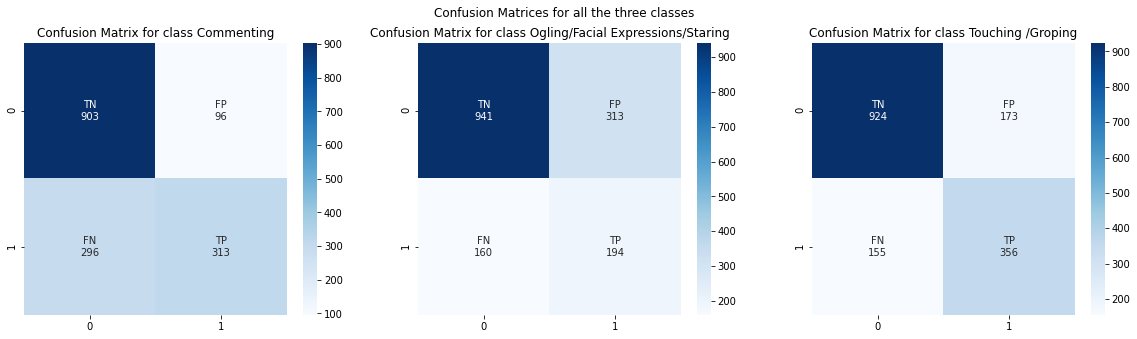

In [ ]:
clf = MultiOutputClassifier(SGDClassifier(loss='log',random_state=25,class_weight='balanced'))

param_grid={
    'estimator__alpha':[0.1,0.01,0.001,0.0001,0.00001,1e-06],
    'estimator__penalty':['l1','l2'] 
}
grid_clf_lr = GridSearchCV(clf,param_grid,scoring='f1_macro',cv=5,n_jobs=-1)
grid_clf_lr.fit(pd.concat([X_train_final_1,X_cv_final_1]),pd.concat([y_train,y_cv]))

print('Best params : ',grid_clf_lr.best_params_)

clf_lr = grid_clf_lr.best_estimator_
predictions = clf_lr.predict (X_test_final_1)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['Logistic Regression','Fasttext-tfidf',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

Best params :  {'estimator__alpha': 0.001, 'estimator__penalty': 'l2'}
Exact match ratio : 0.4900
Hamming score : 0.7720
Micro F1-score : 0.6370
Macro F1-score : 0.6289



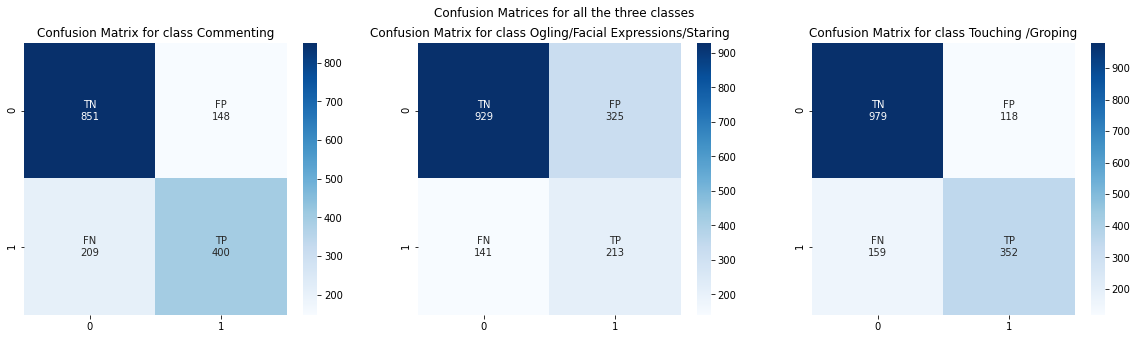

In [ ]:
clf = MultiOutputClassifier(SGDClassifier(loss='log',random_state=25,class_weight='balanced'))

param_grid={
    'estimator__alpha':[0.1,0.01,0.001,0.0001,0.00001,1e-06],
    'estimator__penalty':['l1','l2'] 
}
grid_clf_lr = GridSearchCV(clf,param_grid,scoring='f1_macro',cv=5,n_jobs=-1)
grid_clf_lr.fit(pd.concat([X_train_final_2,X_cv_final_2]),pd.concat([y_train,y_cv]))

print('Best params : ',grid_clf_lr.best_params_)

clf_lr = grid_clf_lr.best_estimator_
predictions = clf_lr.predict (X_test_final_2)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['Logistic Regression','Glove',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

Best params :  {'estimator__alpha': 0.001, 'estimator__penalty': 'l2'}
Exact match ratio : 0.4465
Hamming score : 0.7452
Micro F1-score : 0.6100
Macro F1-score : 0.6019



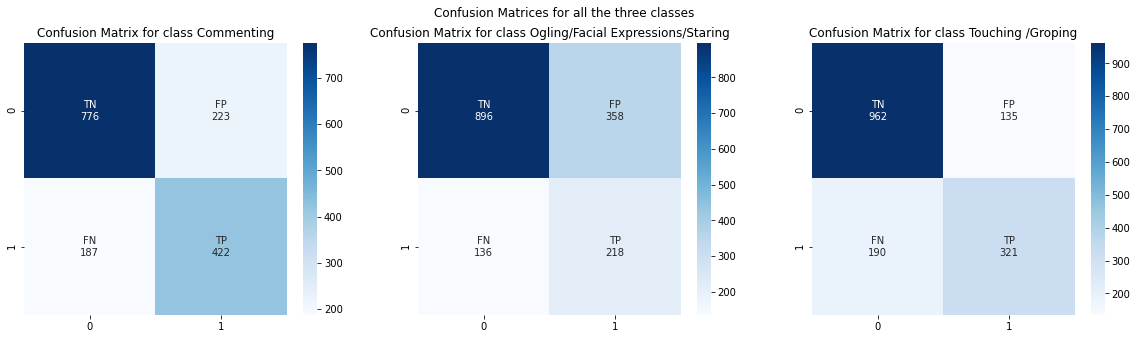

In [ ]:
clf = MultiOutputClassifier(SGDClassifier(loss='log',random_state=25,class_weight='balanced'))

param_grid={
    'estimator__alpha':[0.1,0.01,0.001,0.0001,0.00001,1e-06],
    'estimator__penalty':['l1','l2'] 
}
grid_clf_lr = GridSearchCV(clf,param_grid,scoring='f1_macro',cv=5,n_jobs=-1)
grid_clf_lr.fit(pd.concat([X_train_final_3,X_cv_final_3]),pd.concat([y_train,y_cv]))

print('Best params : ',grid_clf_lr.best_params_)

clf_lr = grid_clf_lr.best_estimator_
predictions = clf_lr.predict (X_test_final_3)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['Logistic Regression','Glove-tfidf',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

##<h2><strong>Using Support Vector Machines</strong><h2>

Best params :  {'estimator__alpha': 0.0001, 'estimator__penalty': 'l1'}
Exact match ratio : 0.4428
Hamming score : 0.7504
Micro F1-score : 0.6219
Macro F1-score : 0.6160



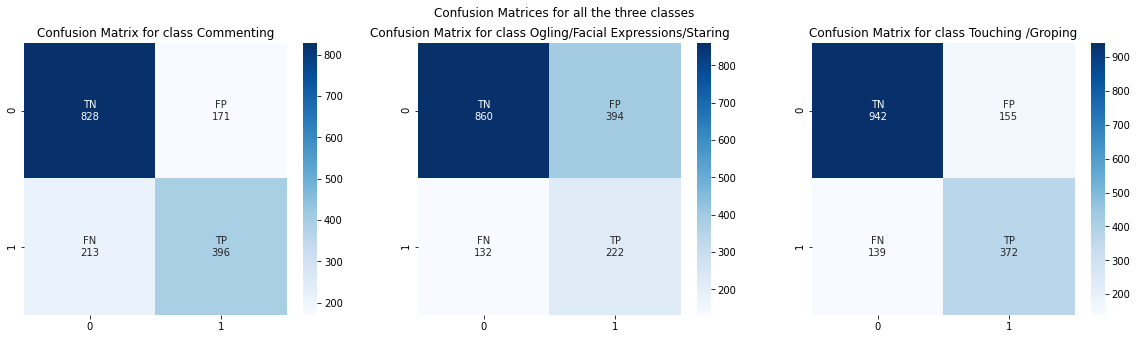

In [ ]:
clf = MultiOutputClassifier(SGDClassifier(loss='hinge',random_state=25,class_weight='balanced'))

param_grid={
    'estimator__alpha':[0.1,0.01,0.001,0.0001,0.00001,1e-06],
    'estimator__penalty':['l1','l2'] 
}
grid_clf_svm = GridSearchCV(clf,param_grid,scoring='f1_macro',cv=5,n_jobs=-1)
grid_clf_svm.fit(pd.concat([X_train_final,X_cv_final]),pd.concat([y_train,y_cv]))

print('Best params : ',grid_clf_svm.best_params_)

clf_svm = grid_clf_svm.best_estimator_
predictions = clf_svm.predict (X_test_final)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['SVM','Fasttext',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

Best params :  {'estimator__alpha': 1e-05, 'estimator__penalty': 'l1'}
Exact match ratio : 0.3993
Hamming score : 0.7284
Micro F1-score : 0.5982
Macro F1-score : 0.5973



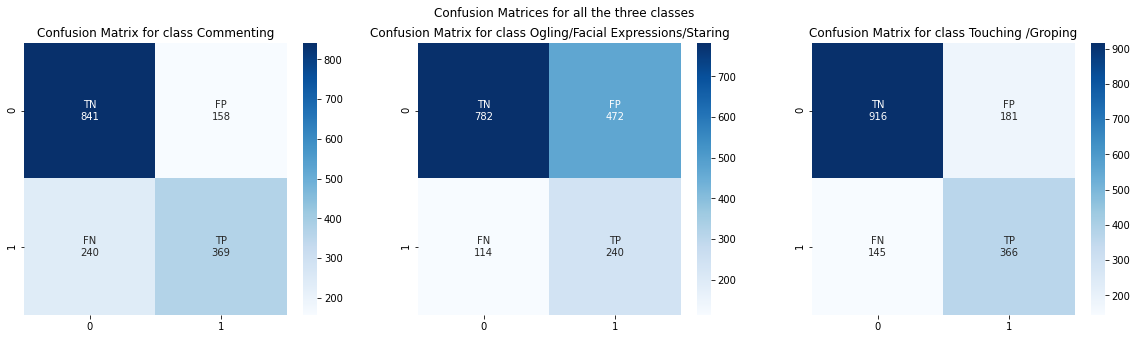

In [ ]:
clf = MultiOutputClassifier(SGDClassifier(loss='hinge',random_state=25,class_weight='balanced'))

param_grid={
    'estimator__alpha':[0.1,0.01,0.001,0.0001,0.00001,1e-06],
    'estimator__penalty':['l1','l2'] 
}
grid_clf_svm = GridSearchCV(clf,param_grid,scoring='f1_macro',cv=5,n_jobs=-1)
grid_clf_svm.fit(pd.concat([X_train_final_1,X_cv_final_1]),pd.concat([y_train,y_cv]))

print('Best params : ',grid_clf_svm.best_params_)

clf_svm = grid_clf_svm.best_estimator_
predictions = clf_svm.predict (X_test_final_1)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['SVM','Fasttext-tfidf',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

Best params :  {'estimator__alpha': 0.001, 'estimator__penalty': 'l2'}
Exact match ratio : 0.5006
Hamming score : 0.7724
Micro F1-score : 0.6481
Macro F1-score : 0.6317



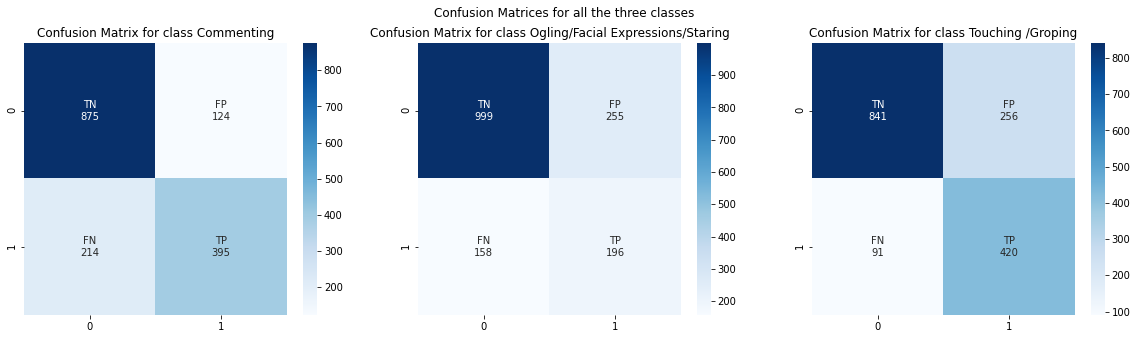

In [ ]:
clf = MultiOutputClassifier(SGDClassifier(loss='hinge',random_state=25,class_weight='balanced'))

param_grid={
    'estimator__alpha':[0.1,0.01,0.001,0.0001,0.00001,1e-06],
    'estimator__penalty':['l1','l2'] 
}
grid_clf_svm = GridSearchCV(clf,param_grid,scoring='f1_macro',cv=5,n_jobs=-1)
grid_clf_svm.fit(pd.concat([X_train_final_2,X_cv_final_2]),pd.concat([y_train,y_cv]))

print('Best params : ',grid_clf_svm.best_params_)

clf_svm = grid_clf_svm.best_estimator_
predictions = clf_svm.predict (X_test_final_2)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['SVM','Glove',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

Best params :  {'estimator__alpha': 0.001, 'estimator__penalty': 'l2'}
Exact match ratio : 0.4919
Hamming score : 0.7720
Micro F1-score : 0.6091
Macro F1-score : 0.5965



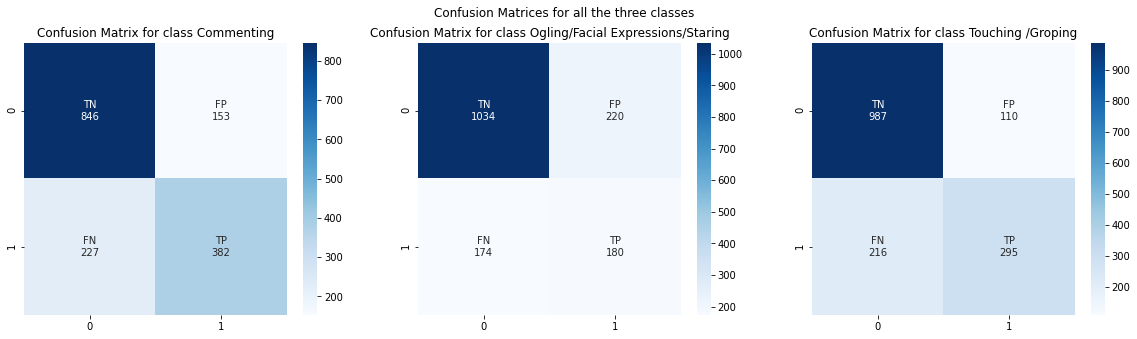

In [ ]:
clf = MultiOutputClassifier(SGDClassifier(loss='hinge',random_state=25,class_weight='balanced'))

param_grid={
    'estimator__alpha':[0.1,0.01,0.001,0.0001,0.00001,1e-06],
    'estimator__penalty':['l1','l2'] 
}
grid_clf_svm = GridSearchCV(clf,param_grid,scoring='f1_macro',cv=5,n_jobs=-1)
grid_clf_svm.fit(pd.concat([X_train_final_3,X_cv_final_3]),pd.concat([y_train,y_cv]))

print('Best params : ',grid_clf_svm.best_params_)

clf_svm = grid_clf_svm.best_estimator_
predictions = clf_svm.predict (X_test_final_3)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['SVM','Glove-tfidf',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

##<h2><strong>Using Random Forest Classifier</strong><h2>

Best params :  {'estimator__max_depth': 5, 'estimator__n_estimators': 300}
Exact match ratio : 0.4664
Hamming score : 0.7645
Micro F1-score : 0.6157
Macro F1-score : 0.6024



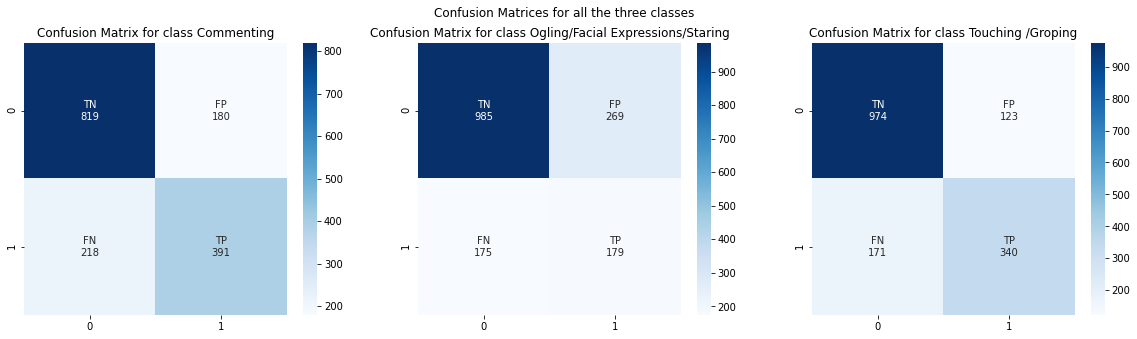

In [ ]:
clf = MultiOutputClassifier(RandomForestClassifier(random_state=25,class_weight='balanced'))

param_grid={
    'estimator__max_depth':[5,10,15],
    'estimator__n_estimators':[50,100,150,200,300]
}
grid_clf_rf = GridSearchCV(clf,param_grid,scoring='f1_macro',cv=5,n_jobs=-1)
grid_clf_rf.fit(pd.concat([X_train_final,X_cv_final]),pd.concat([y_train,y_cv]))

print('Best params : ',grid_clf_rf.best_params_)

clf_rf = grid_clf_rf.best_estimator_
predictions = clf_rf.predict (X_test_final)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['Random Forest','Fasttext',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

Best params :  {'estimator__max_depth': 5, 'estimator__n_estimators': 300}
Exact match ratio : 0.4303
Hamming score : 0.7465
Micro F1-score : 0.5810
Macro F1-score : 0.5696



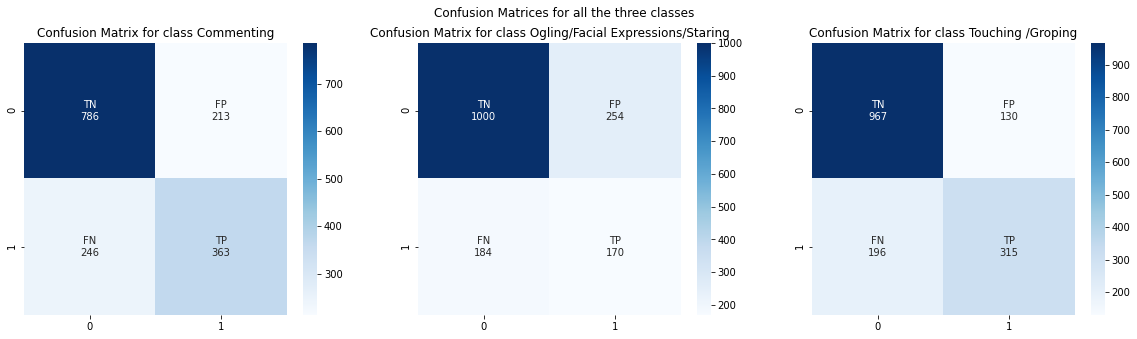

In [ ]:
clf = MultiOutputClassifier(RandomForestClassifier(random_state=25,class_weight='balanced'))

param_grid={
    'estimator__max_depth':[5,10,15],
    'estimator__n_estimators':[50,100,150,200,300]
}
grid_clf_rf = GridSearchCV(clf,param_grid,scoring='f1_macro',cv=5,n_jobs=-1)
grid_clf_rf.fit(pd.concat([X_train_final_1,X_cv_final_1]),pd.concat([y_train,y_cv]))

print('Best params : ',grid_clf_rf.best_params_)

clf_rf = grid_clf_rf.best_estimator_
predictions = clf_rf.predict (X_test_final_1)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['Random Forest','Fasttext-tfidf',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

Best params :  {'estimator__max_depth': 5, 'estimator__n_estimators': 300}
Exact match ratio : 0.5137
Hamming score : 0.7801
Micro F1-score : 0.6284
Macro F1-score : 0.6123



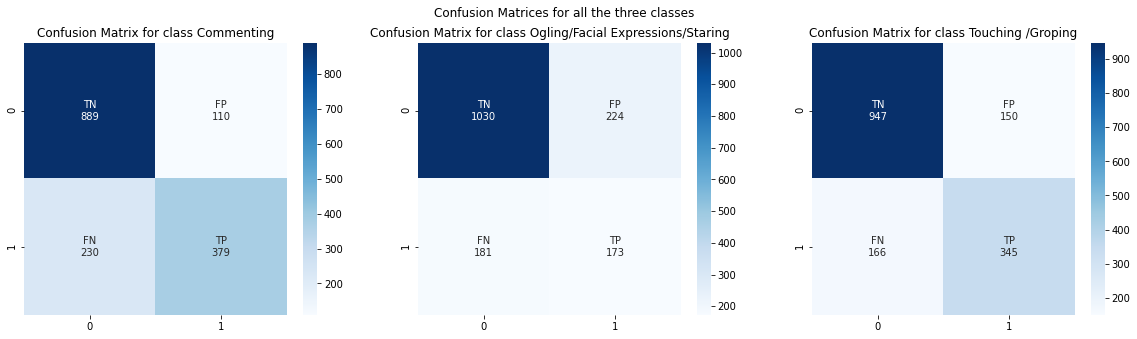

In [ ]:
clf = MultiOutputClassifier(RandomForestClassifier(random_state=25,class_weight='balanced'))

param_grid={
    'estimator__max_depth':[5,10,15],
    'estimator__n_estimators':[50,100,150,200,300]
}
grid_clf_rf = GridSearchCV(clf,param_grid,scoring='f1_macro',cv=5,n_jobs=-1)
grid_clf_rf.fit(pd.concat([X_train_final_2,X_cv_final_2]),pd.concat([y_train,y_cv]))

print('Best params : ',grid_clf_rf.best_params_)

clf_rf = grid_clf_rf.best_estimator_
predictions = clf_rf.predict (X_test_final_2)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['Random Forest','Glove',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

Best params :  {'estimator__max_depth': 5, 'estimator__n_estimators': 300}
Exact match ratio : 0.4621
Hamming score : 0.7581
Micro F1-score : 0.5915
Macro F1-score : 0.5767



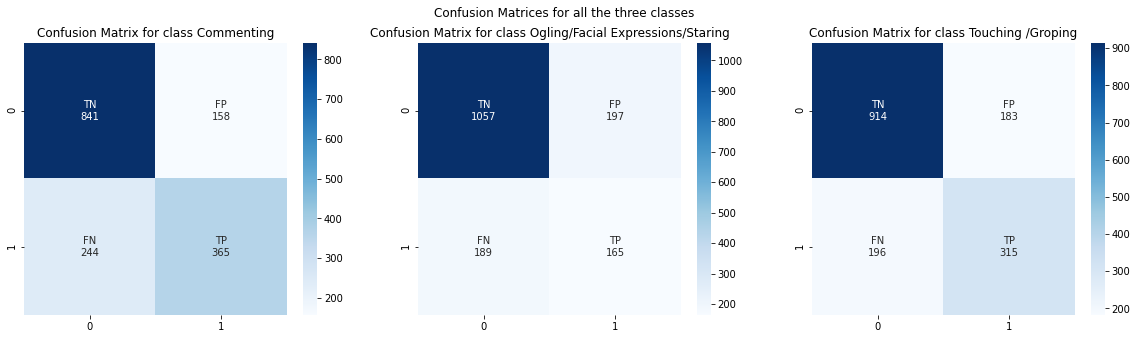

In [ ]:
clf = MultiOutputClassifier(RandomForestClassifier(random_state=25,class_weight='balanced'))

param_grid={
    'estimator__max_depth':[5,10,15],
    'estimator__n_estimators':[50,100,150,200,300]
}
grid_clf_rf = GridSearchCV(clf,param_grid,scoring='f1_macro',cv=5,n_jobs=-1)
grid_clf_rf.fit(pd.concat([X_train_final_3,X_cv_final_3]),pd.concat([y_train,y_cv]))

print('Best params : ',grid_clf_rf.best_params_)

clf_rf = grid_clf_rf.best_estimator_
predictions = clf_rf.predict (X_test_final_3)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['Random Forest','Glove-tfidf',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

##<h2><strong>Using Classifier Chains</strong><h2>

Order of the best Chain is :  [2 1 0]
Exact match ratio : 0.4185
Hamming score : 0.7316
Micro F1-score : 0.5997
Macro F1-score : 0.5998



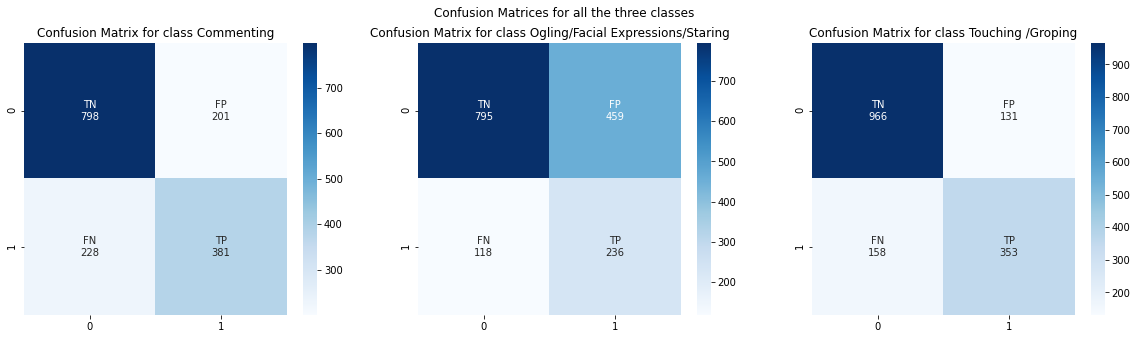

In [ ]:
base_svm=SGDClassifier(loss='hinge',alpha=0.0001,penalty='l1',random_state=25,class_weight='balanced')

chain_clfs = [ClassifierChain(base_svm, order='random', random_state=i) for i in range(10)]
for chain in chain_clfs:
    chain.fit(X_train_final, y_train)

y_pred_chains = np.array([chain.predict(X_cv_final) for chain in chain_clfs])

scores=[]
for predictions in y_pred_chains:
  scores.append(metrics.f1_score(y_cv,predictions,average='macro'))

best_chain=chain_clfs[np.argmax(scores)]

print('Order of the best Chain is : ',best_chain.order_)

best_chain_clf=ClassifierChain(base_svm,order=best_chain.order_)
best_chain_clf.fit(X_train_final,y_train)
predictions=best_chain_clf.predict(X_test_final)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['Classifier Chain','Fasttext',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

Order of the best Chain is :  [1 0 2]
Exact match ratio : 0.4366
Hamming score : 0.7488
Micro F1-score : 0.6217
Macro F1-score : 0.6010



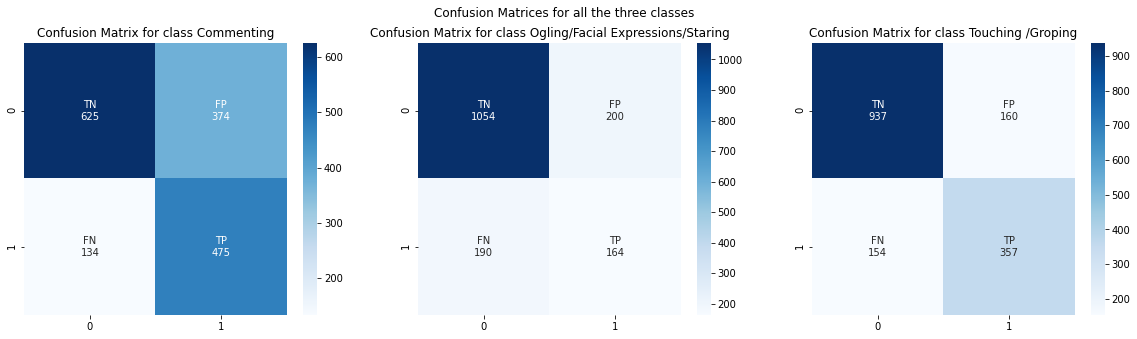

In [ ]:
base_svm=SGDClassifier(loss='hinge',alpha=1e-05,penalty='l1',random_state=25,class_weight='balanced')

chain_clfs = [ClassifierChain(base_svm, order='random', random_state=i) for i in range(10)]
for chain in chain_clfs:
    chain.fit(X_train_final_1, y_train)

y_pred_chains = np.array([chain.predict(X_cv_final_1) for chain in chain_clfs])

scores=[]
for predictions in y_pred_chains:
  scores.append(metrics.f1_score(y_cv,predictions,average='macro'))

best_chain=chain_clfs[np.argmax(scores)]

print('Order of the best Chain is : ',best_chain.order_)

best_chain_clf=ClassifierChain(base_svm,order=best_chain.order_)
best_chain_clf.fit(X_train_final_1,y_train)
predictions=best_chain_clf.predict(X_test_final_1)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['Classifier Chain','Fasttext-tfidf',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

Order of the best Chain is :  [0 1 2]
Exact match ratio : 0.5299
Hamming score : 0.7857
Micro F1-score : 0.6267
Macro F1-score : 0.6115



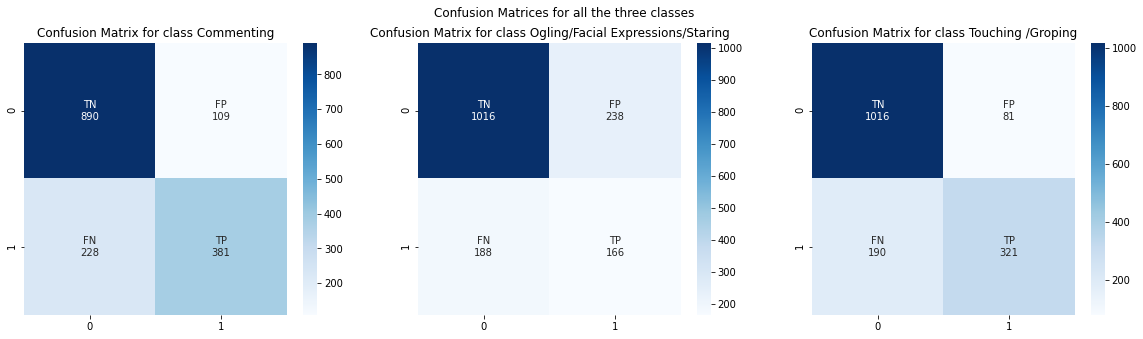

In [ ]:
base_svm=SGDClassifier(loss='hinge',alpha=0.001,penalty='l2',random_state=25,class_weight='balanced')

chain_clfs = [ClassifierChain(base_svm, order='random', random_state=i) for i in range(10)]
for chain in chain_clfs:
    chain.fit(X_train_final_2, y_train)

y_pred_chains = np.array([chain.predict(X_cv_final_2) for chain in chain_clfs])

scores=[]
for predictions in y_pred_chains:
  scores.append(metrics.f1_score(y_cv,predictions,average='macro'))

best_chain=chain_clfs[np.argmax(scores)]

print('Order of the best Chain is : ',best_chain.order_)

best_chain_clf=ClassifierChain(base_svm,order=best_chain.order_)
best_chain_clf.fit(X_train_final_2,y_train)
predictions=best_chain_clf.predict(X_test_final_2)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['Classifier Chain','Glove',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

Order of the best Chain is :  [1 0 2]
Exact match ratio : 0.4353
Hamming score : 0.7228
Micro F1-score : 0.6078
Macro F1-score : 0.5987



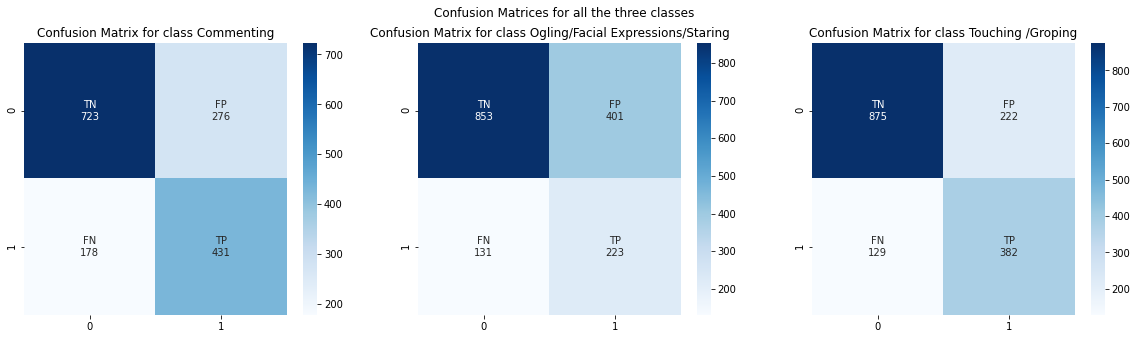

In [ ]:
base_svm=SGDClassifier(loss='hinge',alpha=0.001,penalty='l2',random_state=25,class_weight='balanced')

chain_clfs = [ClassifierChain(base_svm, order='random', random_state=i) for i in range(10)]
for chain in chain_clfs:
    chain.fit(X_train_final_3, y_train)

y_pred_chains = np.array([chain.predict(X_cv_final_3) for chain in chain_clfs])

scores=[]
for predictions in y_pred_chains:
  scores.append(metrics.f1_score(y_cv,predictions,average='macro'))

best_chain=chain_clfs[np.argmax(scores)]

print('Order of the best Chain is : ',best_chain.order_)

best_chain_clf=ClassifierChain(base_svm,order=best_chain.order_)
best_chain_clf.fit(X_train_final_3,y_train)
predictions=best_chain_clf.predict(X_test_final_3)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['Classifier Chain','Glove-tfidf',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

##<h2><strong>Using AdaBoost</strong><h2>

Exact match ratio : 0.5044
Hamming score : 0.7792
Micro F1-score : 0.5905
Macro F1-score : 0.5573



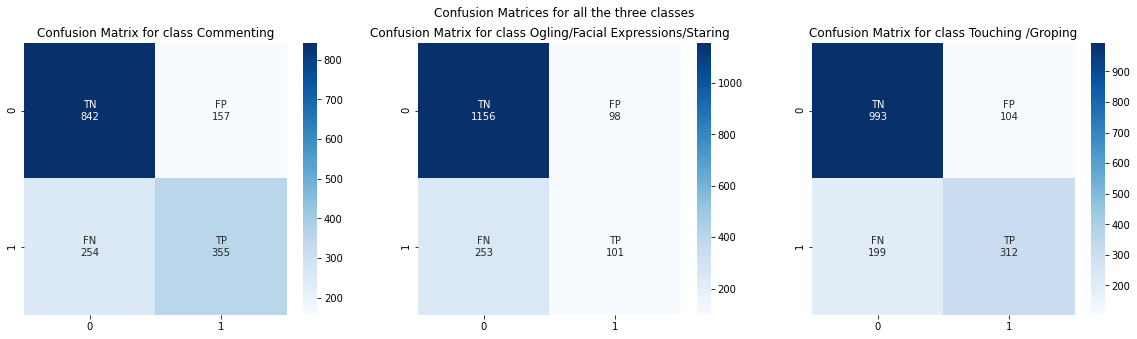

In [ ]:
adaboost_clf=MultiOutputClassifier(AdaBoostClassifier(n_estimators=200,random_state=42))
adaboost_clf.fit(X_train_final,y_train)
predictions = adaboost_clf.predict (X_test_final)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['Adaboost','Fasttext',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

Exact match ratio : 0.4677
Hamming score : 0.7587
Micro F1-score : 0.5474
Macro F1-score : 0.5151



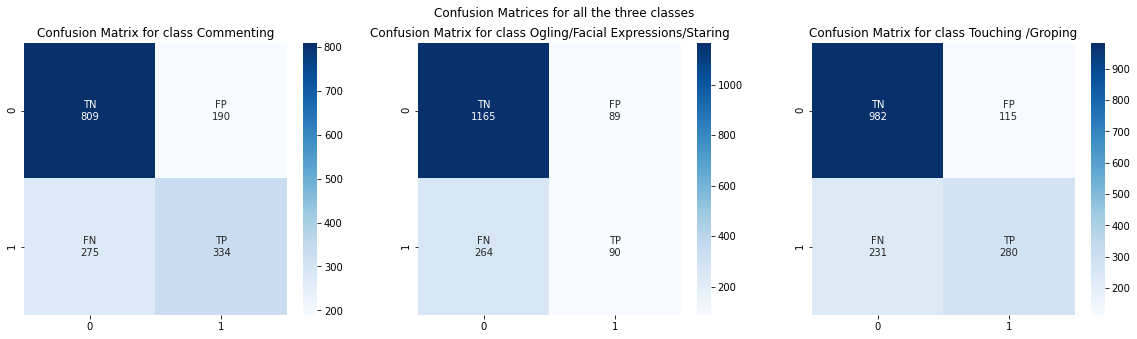

In [ ]:
adaboost_clf=MultiOutputClassifier(AdaBoostClassifier(n_estimators=200,random_state=42))
adaboost_clf.fit(X_train_final_1,y_train)
predictions = adaboost_clf.predict (X_test_final_1)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['Adaboost','Fasttext-tfidf',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

Exact match ratio : 0.5180
Hamming score : 0.7842
Micro F1-score : 0.6061
Macro F1-score : 0.5769



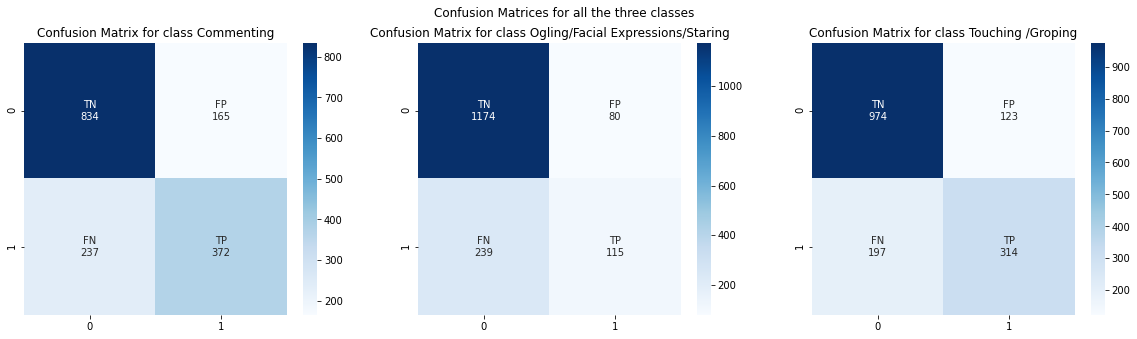

In [ ]:
adaboost_clf=MultiOutputClassifier(AdaBoostClassifier(n_estimators=200,random_state=42))
adaboost_clf.fit(X_train_final_2,y_train)
predictions = adaboost_clf.predict (X_test_final_2)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['Adaboost','Glove',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

Exact match ratio : 0.4751
Hamming score : 0.7591
Micro F1-score : 0.5595
Macro F1-score : 0.5338



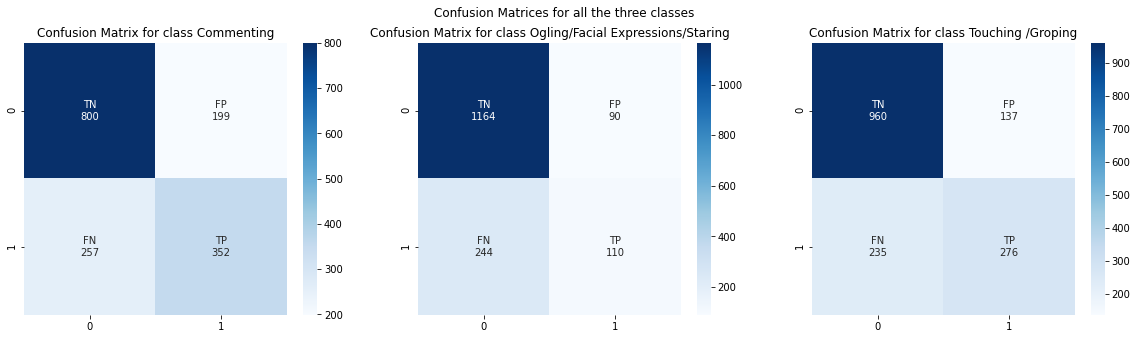

In [ ]:
adaboost_clf=MultiOutputClassifier(AdaBoostClassifier(n_estimators=200,random_state=42))
adaboost_clf.fit(X_train_final_3,y_train)
predictions = adaboost_clf.predict (X_test_final_3)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['Adaboost','Glove-tfidf',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

##<h2><strong>Using LightGBM</strong><h2>

In [ ]:
clf = MultiOutputClassifier(LGBMClassifier(random_state=25,class_weight='balanced'))

param_grid={
    'estimator__max_depth':[3,5, 10],
    'estimator__n_estimators':[100,500,1000]
}
grid_clf_lgb = GridSearchCV(clf,param_grid,scoring='f1_macro',cv=5,n_jobs=-1,verbose=4)
grid_clf_lgb.fit(pd.concat([X_train_final_2,X_cv_final_2]), pd.concat([y_train,y_cv]))

In [ ]:
grid_clf_lgb.best_params_

{'estimator__max_depth': 3, 'estimator__n_estimators': 500}

In [ ]:
clf_lgb=MultiOutputClassifier(LGBMClassifier(n_estimators=500,max_depth=3,random_state=25,class_weight='balanced'))
clf_lgb.fit(X_train_final_2,y_train)

Exact match ratio : 0.5473
Hamming score : 0.7958
Micro F1-score : 0.6588
Macro F1-score : 0.6395



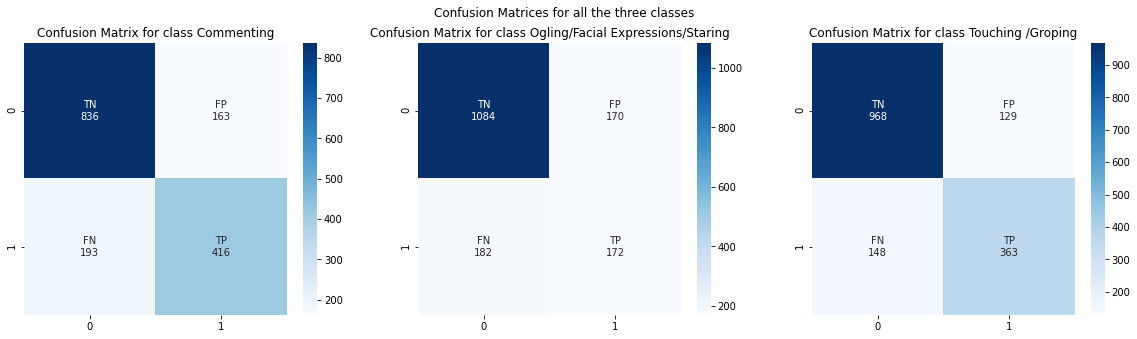

In [ ]:
predictions = clf_lgb.predict (X_test_final_2)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
#results.loc[len(results.index)]=['LightGBM','Glove',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

In [ ]:
pickle.dump(clf_lgb,open('lightgbm.pkl','wb'))

In [ ]:
pickle.dump(scaler,open('scalar.pkl','wb'))

##Using Stacking Classifier 

Exact match ratio : 0.5473
Hamming score : 0.7958
Micro F1-score : 0.6588
Macro F1-score : 0.6395



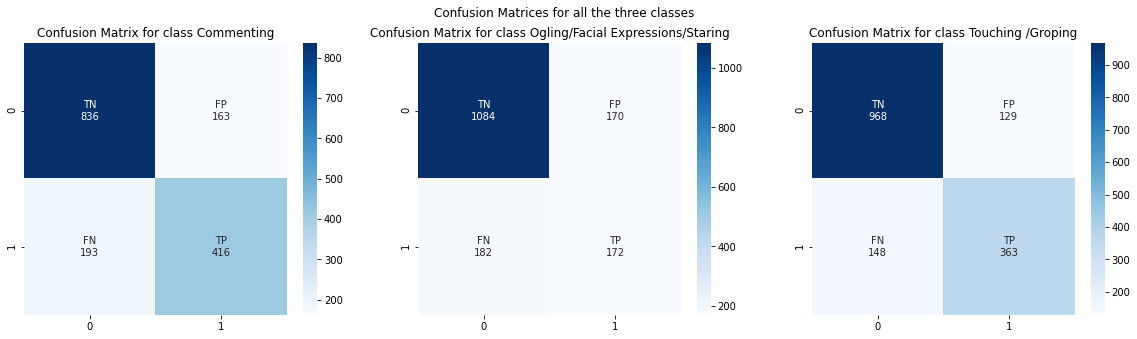

In [ ]:
#Using all best models by looking at the previously trained models

clf1=MultiOutputClassifier(SGDClassifier(loss='log',alpha=0.001,penalty='l2',random_state=25,class_weight='balanced'))
clf2=MultiOutputClassifier(SGDClassifier(loss='hinge',alpha=0.001,penalty='l2',random_state=25,class_weight='balanced'))
clf3=MultiOutputClassifier(LGBMClassifier(n_estimators=500,max_depth=3,random_state=25,class_weight='balanced'))

base_svm=SGDClassifier(loss='hinge',alpha=0.001,penalty='l2',random_state=25,class_weight='balanced')
clf4=ClassifierChain(base_svm,order=[0,1,2])

lr = MultiOutputClassifier(LogisticRegression(random_state=25,class_weight='balanced'))

sclf = StackingClassifier(classifiers=[clf1, clf2,clf3,clf4], meta_classifier=lr)
sclf.fit(X_train_final_2,y_train)

predictions = sclf.predict (X_test_final_2)

hamming_loss,emr,hamming_score,f1_micro,f1_macro=get_metrics(predictions)
results.loc[len(results.index)]=['Stacking Classifier','Glove',f1_macro]

print("Exact match ratio : {:.4f}".format(emr))
print("Hamming score : {:.4f}".format(hamming_score))
print("Micro F1-score : {:.4f}".format(f1_micro))
print("Macro F1-score : {:.4f}".format(f1_macro))
print('')
cf_matrix=multilabel_confusion_matrix(y_test, predictions)
print_cf_matrix(cf_matrix)

##Results

In [ ]:
print('Models which got above 0.6 F1-macro score : \n')
results[results['F1-Macro']>=0.6]

Models which got above 0.6 F1-macro score : 



,Model,Word Embeddings,F1-Macro
4,Logistic Regression,Fasttext,0.625004
6,Logistic Regression,Glove,0.628886
7,Logistic Regression,Glove-tfidf,0.601924
8,SVM,Fasttext,0.615988
10,SVM,Glove,0.631659
12,Random Forest,Fasttext,0.602416
14,Random Forest,Glove,0.612317
17,Classifier Chain,Fasttext-tfidf,0.600985
18,Classifier Chain,Glove,0.611510
24,LightGBM,Glove,0.639473


We can Observe that Glove model if doing better than other word embeddings

<h1><strong><font color='green'>Deep Learning Models </font></strong></h1>

##DL

In [ ]:
#Creating a copies of original data
final_train=train.copy()
final_cv=cv.copy()
final_test=test.copy()

In [ ]:
def preprocess_text(text):
  '''This function does all the text preprocessing steps and return a clean text'''
  text=decontracted(text)
  text=remove_special_chars(text)
  return text

In [ ]:
#Preprocessing the text data of train,cv and test

final_train['Description']=final_train['Description'].apply(preprocess_text)
final_cv['Description']=final_cv['Description'].apply(preprocess_text)
final_test['Description']=final_test['Description'].apply(preprocess_text)

In [ ]:
#Creating input and target data

X_train,y_train=pd.DataFrame(final_train.iloc[:,0]),final_train.iloc[:,1:]
X_cv,y_cv=pd.DataFrame(final_cv.iloc[:,0]),final_cv.iloc[:,1:]
X_test,y_test=pd.DataFrame(final_test.iloc[:,0]),final_test.iloc[:,1:]

In [ ]:
print('Shapes of train,cross validate and test data :')
print('X_ train shape : ',X_train.shape,',  y_train shape : ', y_train.shape)
print('X_ cv shape :     ',X_cv.shape, '   ,  y_cv shape : ',y_cv.shape)
print('X_ test shape :  ',X_test.shape, ',  y_test shape : ',y_test.shape)

Shapes of train,cross validate and test data :
X_ train shape :  (6659, 1) ,  y_train shape :  (6659, 3)
X_ cv shape :      (940, 1)    ,  y_cv shape :  (940, 3)
X_ test shape :   (1608, 1) ,  y_test shape :  (1608, 3)


In [ ]:
lengths=[]
for index,row in X_train.iterrows():
  lengths.append(len(row['Description'].split()))
lengths=sorted(lengths)

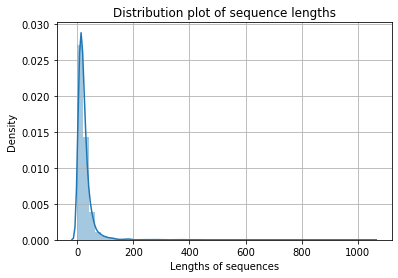

In [ ]:
plt.grid()
plt.title('Distribution plot of sequence lengths')
plt.xlabel('Lengths of sequences')
sns.distplot(lengths,hist=True, kde=True)

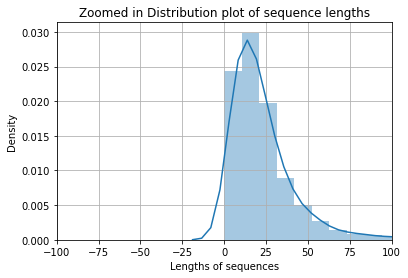

In [ ]:
plt.grid()
plt.xlim(-100,100)
plt.xlabel('Lengths of sequences')
plt.title('Zoomed in Distribution plot of sequence lengths')
sns.distplot(lengths,hist=True, kde=True,bins=100)

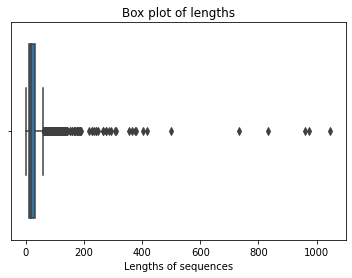

In [ ]:
plt.xlabel('Lengths of sequences')
plt.title('Box plot of lengths')
ax = sns.boxplot(x=lengths)

In [ ]:
count=0
for i in lengths:
  if i<=150:
    count+=1
print('percentage of lengths that has length less than or equal to 150 :',(count/len(X_train))*100)

percentage of lengths that has length less than or equal to 150 : 99.23411923712268


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer=None

In [ ]:
tokenizer=Tokenizer(num_words=8000,filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n',oov_token='UNKNOWN')
tokenizer.fit_on_texts(X_train['Description'])

sequences=tokenizer.texts_to_sequences(X_train['Description'])
padded_text=pad_sequences(sequences,padding="post",truncating="pre",maxlen=150)

sequences_cv=tokenizer.texts_to_sequences(X_cv['Description'])
padded_text_cv=pad_sequences(sequences_cv,padding="post",truncating="pre",maxlen=150)

sequences_test=tokenizer.texts_to_sequences(X_test['Description'])
padded_text_test=pad_sequences(sequences_test,padding="post",truncating="pre",maxlen=150)

In [ ]:
pickle.dump(tokenizer,open('tokenizer.pkl','wb'))

In [ ]:
fasttext_word_embeddings = dict()
fasttext_model = open('wiki-news-300d-1M-subword.vec',encoding='utf-8')
for line in fasttext_model: # For each line in vector file
  row = line.split() 
  word = row[0] # First word 
  vector = np.asarray(row[1:], dtype='float32') # Remaining text is 300 dimensional embeddings
  fasttext_word_embeddings[word] = vector # Creating a dictionay with word as key and embeddings  vector as value
fasttext_model.close()

fasttext_words=fasttext_word_embeddings.keys()

In [ ]:
#Getting the word embedding from pretrained glove model.

glove_word_embeddings = dict()
glove_model = open('glove.6B.300d.txt')
for line in glove_model: # For each line in text file
  row = line.split() 
  word = row[0] # First word 
  vector = np.asarray(row[1:], dtype='float32') # Remaining text is 300 dimensional embeddings
  glove_word_embeddings[word] = vector # Creating a dictionay with word as key and embeddings  vector as value
glove_model.close()

glove_words=glove_word_embeddings.keys()

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix_fasttext = np.zeros((vocab_size, 300))
for word,index in tokenizer.word_index.items():
  if (word in fasttext_words):
    word_vec=fasttext_word_embeddings.get(word)
    embedding_matrix_fasttext[index]=word_vec

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix_glove = np.zeros((vocab_size, 300))
for word,index in tokenizer.word_index.items():
  if (word in glove_words):
    word_vec=glove_word_embeddings.get(word)
    embedding_matrix_glove[index]=word_vec

In [ ]:
inp_length=len(padded_text[0])
print('Length of each sequence :',len(padded_text[0]))
print('Number of sequences in train data : ',len(padded_text))
print('Number of sequences in cv data : ',len(padded_text_cv))
print('Number of sequences in test data : ',len(padded_text_test))

Length of each sequence : 150
Number of sequences in train data :  6659
Number of sequences in cv data :  940
Number of sequences in test data :  1608


In [ ]:
from tensorflow.keras.layers import Dense,Input,Conv1D,Activation,Dropout,Flatten,Embedding,Concatenate,MaxPool1D,GlobalMaxPool1D,LSTM,Reshape
from tensorflow.keras.models import Model
import tensorflow as tf
import tensorflow.keras as keras
from keras.callbacks import Callback
from  tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
from keras.callbacks import Callback
import tensorflow.keras.backend as K
from tensorflow.keras.utils import plot_model
from sklearn.metrics import f1_score

In [ ]:
def get_f1_score(model,x,y,threshold):
  predicted=model.predict(x)
  target=np.array(y)
  predicted=predicted>threshold
  predicted = predicted.astype(int)
  f1 = f1_score(target,predicted,average='macro') 
  return f1

In [ ]:
class MetricsCustom(Callback):
  '''Creating custom callback metric function to calculate micro f1-score and AUC'''
  def __init__(self, train_data,validation_data,threshold,save_as):
    super(MetricsCustom, self).__init__()
    self.validation_data = validation_data # Validation data is taken from the arguments passed by funtion calling
    self.train_data=train_data
    self.threshold=threshold
    self.save_as=save_as
    self.best_score=0
  def on_train_begin(self,logs={}):
    self.f1_score_val=[]  #Initialising the variables that are used during training
    self.f1_score_train=[]
  def on_epoch_end(self,epoch,logs={}): # At every epoch end this function is called

    train_f1=get_f1_score(self.model,self.train_data[0],self.train_data[1],self.threshold) 
    self.f1_score_train.append(train_f1)

    val_f1=get_f1_score(self.model,self.validation_data[0],self.validation_data[1],self.threshold) 
    self.f1_score_val.append(val_f1)
    if val_f1>self.best_score:
      self.model.save_weights(self.save_as)
      self.best_score=val_f1
    print('  -f1_score : {:.4f}  -val_f1_score : {:.4f} '.format(train_f1,val_f1)) # Printing f1-score and AUC at the end of each epoch

In [ ]:
labels=['Commenting', 'Ogling/Facial Expressions/Staring', 'Touching /Groping']
weight_0={}
weight_1={}
for label in labels:
  weights = class_weight.compute_class_weight('balanced',np.unique(y_train[label]),y_train[label])
  weight_0[label]=weights[0]
  weight_1[label]=weights[1]

print(weight_0)
print(weight_1)

{'Commenting': 0.8128662109375, 'Ogling/Facial Expressions/Staring': 0.6331051530709261, 'Touching /Groping': 0.7208270188352457}
{'Commenting': 1.2990635973468592, 'Ogling/Facial Expressions/Staring': 2.378214285714286, 'Touching /Groping': 1.6321078431372549}


In [ ]:
def loss_fn(y_true,y_pred):
    loss = 0
    y_true=tf.dtypes.cast(y_true, tf.float32)
    labels=['Commenting', 'Ogling/Facial Expressions/Staring', 'Touching /Groping']
    for index,label in enumerate(labels):
      loss += -(weight_1[label]*y_true[index]*K.log(y_pred[index]) + weight_0[label]*(1-y_true[index])*K.log(1-y_pred[index]))
    return loss

<h2><strong>Using CNN Model
</strong><h2>

In [ ]:
def get_model1(embeddings):
  input_layer=Input(shape=(inp_length))
  embedding_layer=Embedding(vocab_size,300,input_length=inp_length)(input_layer) 
  #embedding_layer=Reshape(target_shape=(100,300,1))(embedding_layer)
  x=Conv1D(filters=128,kernel_size=3,kernel_initializer='glorot_normal',activation='tanh')(embedding_layer)
  x=GlobalMaxPool1D()(x)
  y=Conv1D(filters=128,kernel_size=4,kernel_initializer='glorot_normal',activation='tanh')(embedding_layer)
  y=GlobalMaxPool1D()(y)
  z=Conv1D(filters=128,kernel_size=5,kernel_initializer='glorot_normal',activation='tanh')(embedding_layer)
  z=GlobalMaxPool1D()(z)
  conv1d_layer = [x,y,z]
  concatenate=Concatenate(axis=-1)(conv1d_layer) 
  flatten=Flatten()(concatenate)
  drop=Dropout(0.4)(flatten)
  x=Dense(256,activation='relu',kernel_initializer='he_normal')(drop)
  x=Dropout(0.4)(x)
  x=Dense(64,activation='relu',kernel_initializer='he_normal')(x)
  x=Dropout(0.4)(x)
  output=Dense(3,activation='sigmoid')(x) 
  model1=keras.Model(input_layer,output)
  model1.get_layer('embedding').set_weights([embeddings])
  model1.get_layer('embedding').trainable=False

  return model1

In [ ]:
tf.keras.backend.clear_session() 
tf.get_logger().setLevel('INFO')
tf.random.set_seed(42)

#Using Fasttext embeddings
fasttext_model1=get_model1(embedding_matrix_fasttext)
fasttext_model1.compile(optimizer=tf.keras.optimizers.Adam(1e-03,clipvalue=0.5),loss=loss_fn)

In [ ]:
fasttext_model1.summary()

In [ ]:
plot_model(fasttext_model1, 'model1.png', show_shapes=True)

In [ ]:
reduce_lr=ReduceLROnPlateau(monitor='val_loss', factor=0.9,patience=1, verbose=0) # reducing the learning rate by 10% if the metric does not improve for each epoch
customMetrics=MetricsCustom((padded_text,y_train),(padded_text_cv,y_cv),threshold=0.5,save_as='fasttext_model1.hdf5') # Creating a class object for customMetrics class

callback_list=[reduce_lr,customMetrics]

fasttext_model1.fit(padded_text, y_train,batch_size=16,epochs=25,validation_data=(padded_text_cv,y_cv),callbacks=callback_list)

Epoch 1/25
417/417 [==============================] - 36s 7ms/step - loss: 2.2017 - val_loss: 2.2113
  -f1_score : 0.2098  -val_f1_score : 0.2289 
Epoch 2/25
417/417 [==============================] - 2s 6ms/step - loss: 2.1524 - val_loss: 2.1079
  -f1_score : 0.3697  -val_f1_score : 0.3954 
Epoch 3/25
417/417 [==============================] - 3s 6ms/step - loss: 2.1094 - val_loss: 2.0956
  -f1_score : 0.4049  -val_f1_score : 0.4150 
Epoch 4/25
417/417 [==============================] - 2s 6ms/step - loss: 2.0446 - val_loss: 1.9770
  -f1_score : 0.4671  -val_f1_score : 0.4842 
Epoch 5/25
417/417 [==============================] - 2s 6ms/step - loss: 1.9504 - val_loss: 1.8552
  -f1_score : 0.4910  -val_f1_score : 0.5037 
Epoch 6/25
417/417 [==============================] - 2s 6ms/step - loss: 1.9450 - val_loss: 1.8323
  -f1_score : 0.4996  -val_f1_score : 0.5084 
Epoch 7/25
417/417 [==============================] - 2s 6ms/step - loss: 1.8447 - val_loss: 1.7558
  -f1_score : 0.5713  -

In [ ]:
fasttext_model1.load_weights('fasttext_model1.hdf5')

In [ ]:
model1_f1=get_f1_score(fasttext_model1,padded_text_test,y_test,0.5)
print('F1-macro : ',model1_f1)
results.loc[len(results.index)]=['CNN','Fasttext',model1_f1]

F1-macro :  0.6634174209041388


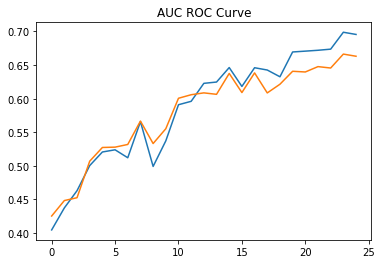

In [ ]:
train_f1=customMetrics.f1_score_train
val_f1=customMetrics.f1_score_val
plt.plot(range(len(train_f1)),train_f1)
plt.plot(range(len(val_f1)),val_f1)
plt.title('AUC ROC Curve')
plt.show()

In [ ]:
tf.keras.backend.clear_session() 
tf.get_logger().setLevel('INFO')
tf.random.set_seed(42)
glove_model1=get_model1(embedding_matrix_glove)
glove_model1.compile(optimizer=tf.keras.optimizers.Adam(1e-04,clipvalue=0.5),loss=loss_fn)

reduce_lr=ReduceLROnPlateau(monitor='val_loss', factor=0.9,patience=1, verbose=0) # reducing the learning rate by 10% if the metric does not improve for each epoch
customMetrics=MetricsCustom((padded_text,y_train),(padded_text_cv,y_cv),threshold=0.5,save_as='glove_model1.hdf5') # Creating a class object for customMetrics class

callback_list=[reduce_lr,customMetrics]

glove_model1.fit(padded_text, y_train,batch_size=16,epochs=25,validation_data=(padded_text_cv,y_cv),callbacks=callback_list)

Epoch 1/25
417/417 [==============================] - 3s 6ms/step - loss: 2.4842 - val_loss: 2.1837
  -f1_score : 0.3820  -val_f1_score : 0.3864 
Epoch 2/25
417/417 [==============================] - 2s 6ms/step - loss: 2.2030 - val_loss: 2.1772
  -f1_score : 0.3825  -val_f1_score : 0.3769 
Epoch 3/25
417/417 [==============================] - 2s 6ms/step - loss: 2.1519 - val_loss: 2.1675
  -f1_score : 0.4344  -val_f1_score : 0.4410 
Epoch 4/25
417/417 [==============================] - 2s 6ms/step - loss: 2.0837 - val_loss: 2.1149
  -f1_score : 0.4440  -val_f1_score : 0.4488 
Epoch 5/25
417/417 [==============================] - 3s 6ms/step - loss: 2.0986 - val_loss: 2.0695
  -f1_score : 0.4815  -val_f1_score : 0.4960 
Epoch 6/25
417/417 [==============================] - 2s 6ms/step - loss: 2.0435 - val_loss: 1.9572
  -f1_score : 0.5534  -val_f1_score : 0.5549 
Epoch 7/25
417/417 [==============================] - 3s 6ms/step - loss: 1.9303 - val_loss: 1.8913
  -f1_score : 0.5863  -v

In [ ]:
glove_model1.load_weights('glove_model1.hdf5')

In [ ]:
model1_f1=get_f1_score(glove_model1,padded_text_test,y_test,0.5)
print('F1-macro : ',model1_f1)
results.loc[len(results.index)]=['CNN','Glove',model1_f1]

F1-macro :  0.6607634809371116


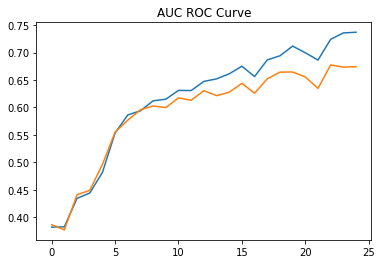

In [ ]:
train_f1=customMetrics.f1_score_train
val_f1=customMetrics.f1_score_val
plt.plot(range(len(train_f1)),train_f1)
plt.plot(range(len(val_f1)),val_f1)
plt.title('AUC ROC Curve')
plt.show()

<h2><strong>Using LSTM Model
</strong><h2>

In [ ]:
def get_model2(embeddings):
  
  input_layer=Input(shape=(inp_length))
  embedding_layer=Embedding(vocab_size,300,input_length=inp_length,name='embedding')(input_layer) 
  x=tf.keras.layers.Bidirectional(LSTM(128,return_sequences=True))(embedding_layer)
  x=tf.keras.layers.Bidirectional(LSTM(128))(x)
  x=Dense(512,activation='relu',kernel_initializer='he_normal')(x)
  x=Dropout(0.2)(x)
  x=Dense(128,activation='relu',kernel_initializer='he_normal')(x)
  x=Dense(64,activation='relu',kernel_initializer='he_normal')(x)
  output=Dense(3,activation='sigmoid')(x) 
  model2=keras.Model(input_layer,output)
  model2.get_layer('embedding').set_weights([embeddings])
  model2.get_layer('embedding').trainable=False

  return model2

In [ ]:
tf.keras.backend.clear_session() 
tf.get_logger().setLevel('INFO')
tf.random.set_seed(42)
fasttext_model2=get_model2(embedding_matrix_fasttext)
fasttext_model2.compile(optimizer=tf.keras.optimizers.Adam(1e-04,clipvalue=0.5),loss=loss_fn)

In [ ]:
fasttext_model2.summary()

In [ ]:
plot_model(fasttext_model2, 'model2.png', show_shapes=True)

In [ ]:
reduce_lr=ReduceLROnPlateau(monitor='val_loss', factor=0.9,patience=1, verbose=0) # reducing the learning rate by 10% if the metric does not improve for each epoch

customMetrics=MetricsCustom((padded_text,y_train),(padded_text_cv,y_cv),threshold=0.5,save_as='fasttext_model2.hdf5') # Creating a class object for customMetrics class

callback_list=[reduce_lr,customMetrics]

fasttext_model2.fit(padded_text, y_train,batch_size=16,epochs=30,validation_data=(padded_text_cv,y_cv),callbacks=callback_list)

Epoch 1/30
417/417 [==============================] - 19s 33ms/step - loss: 2.1362 - val_loss: 2.1881
  -f1_score : 0.3416  -val_f1_score : 0.3420 
Epoch 2/30
417/417 [==============================] - 13s 30ms/step - loss: 2.0993 - val_loss: 2.1430
  -f1_score : 0.3418  -val_f1_score : 0.3422 
Epoch 3/30
417/417 [==============================] - 12s 29ms/step - loss: 2.0621 - val_loss: 2.0983
  -f1_score : 0.3702  -val_f1_score : 0.3648 
Epoch 4/30
417/417 [==============================] - 12s 29ms/step - loss: 2.0088 - val_loss: 2.0278
  -f1_score : 0.4556  -val_f1_score : 0.4666 
Epoch 5/30
417/417 [==============================] - 12s 29ms/step - loss: 1.9834 - val_loss: 1.9838
  -f1_score : 0.5171  -val_f1_score : 0.5280 
Epoch 6/30
417/417 [==============================] - 12s 29ms/step - loss: 1.9806 - val_loss: 1.9902
  -f1_score : 0.5200  -val_f1_score : 0.5371 
Epoch 7/30
417/417 [==============================] - 12s 29ms/step - loss: 1.8961 - val_loss: 1.9456
  -f1_scor

In [ ]:
fasttext_model2.load_weights('fasttext_model2.hdf5')

In [ ]:
model2_f1=get_f1_score(fasttext_model2,padded_text_test,y_test,0.5)
print('F1-macro : ',model2_f1)
results.loc[len(results.index)]=['LSTM','Fasttext',model2_f1]

F1-macro :  0.5881060966971243


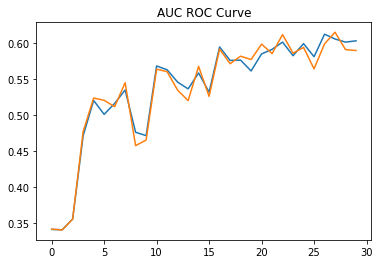

In [ ]:
train_f1=customMetrics.f1_score_train
val_f1=customMetrics.f1_score_val
plt.plot(range(len(train_f1)),train_f1)
plt.plot(range(len(val_f1)),val_f1)
plt.title('AUC ROC Curve')
plt.show()

In [ ]:
tf.keras.backend.clear_session() 
tf.get_logger().setLevel('INFO')
tf.random.set_seed(42)

glove_model2=get_model2(embedding_matrix_glove)
glove_model2.compile(optimizer=tf.keras.optimizers.Adam(1e-04,clipvalue=0.5),loss=loss_fn)

reduce_lr=ReduceLROnPlateau(monitor='val_loss', factor=0.9,patience=1, verbose=0) # reducing the learning rate by 10% if the metric does not improve for each epoch

customMetrics=MetricsCustom((padded_text,y_train),(padded_text_cv,y_cv),threshold=0.5,save_as='glove_model2.hdf5') # Creating a class object for customMetrics class

callback_list=[reduce_lr,customMetrics]

glove_model2.fit(padded_text, y_train,batch_size=16,epochs=25,validation_data=(padded_text_cv,y_cv),callbacks=callback_list)

Epoch 1/25
417/417 [==============================] - 19s 34ms/step - loss: 2.1260 - val_loss: 2.1210
  -f1_score : 0.3713  -val_f1_score : 0.3727 
Epoch 2/25
417/417 [==============================] - 12s 29ms/step - loss: 1.9206 - val_loss: 1.9520
  -f1_score : 0.4718  -val_f1_score : 0.4767 
Epoch 3/25
417/417 [==============================] - 12s 29ms/step - loss: 1.8175 - val_loss: 1.8105
  -f1_score : 0.5635  -val_f1_score : 0.5763 
Epoch 4/25
417/417 [==============================] - 12s 29ms/step - loss: 1.7369 - val_loss: 1.7304
  -f1_score : 0.5898  -val_f1_score : 0.5980 
Epoch 5/25
417/417 [==============================] - 12s 29ms/step - loss: 1.6804 - val_loss: 1.6890
  -f1_score : 0.6091  -val_f1_score : 0.6140 
Epoch 6/25
417/417 [==============================] - 12s 29ms/step - loss: 1.6522 - val_loss: 1.6996
  -f1_score : 0.6295  -val_f1_score : 0.6218 
Epoch 7/25
417/417 [==============================] - 12s 30ms/step - loss: 1.6091 - val_loss: 1.6113
  -f1_scor

In [ ]:
glove_model2.load_weights('glove_model2.hdf5')

In [ ]:
model2_f1=get_f1_score(glove_model2,padded_text_test,y_test,0.5)
print('F1-macro : ',model2_f1)
results.loc[len(results.index)]=['LSTM','Glove',model2_f1]

F1-macro :  0.6639588204925749


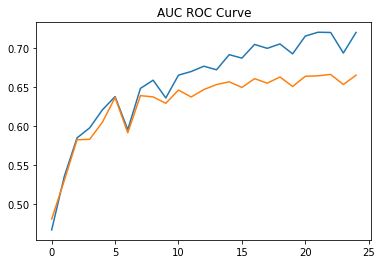

In [ ]:
train_f1=customMetrics.f1_score_train
val_f1=customMetrics.f1_score_val
plt.plot(range(len(train_f1)),train_f1)
plt.plot(range(len(val_f1)),val_f1)
plt.title('AUC ROC Curve')
plt.show()

<h2><strong>Using CNN-LSTM Model

</strong><h2>

In [ ]:
def get_model3(embeddings):
  input_layer=Input(shape=(inp_length))
  embedding_layer=Embedding(vocab_size,300,input_length=inp_length,name='embedding')(input_layer)
  #embedding_layer=tf.keras.layers.Reshape(target_shape=(inp_length,300,1))(embedding_layer)
  x=Conv1D(128,kernel_size=3,activation='relu',kernel_initializer='he_normal',padding='same')(embedding_layer)
  x=tf.keras.layers.MaxPool1D()(x)
  y=Conv1D(128,kernel_size=4,activation='relu',kernel_initializer='he_normal',padding='same')(embedding_layer)
  y=tf.keras.layers.MaxPool1D()(y)
  z=Conv1D(128,kernel_size=5,activation='relu',kernel_initializer='he_normal',padding='same')(embedding_layer)
  z=tf.keras.layers.MaxPool1D()(z)
  p=Conv1D(128,kernel_size=7,activation='relu',kernel_initializer='he_normal',padding='same')(embedding_layer)
  p=tf.keras.layers.MaxPool1D()(p)
  conv_layer=[x,y,z,p]
  x=Concatenate(axis=-1)(conv_layer) 
  x=Dropout(0.2)(x)
  x=tf.keras.layers.Bidirectional(LSTM(150))(x)
  x=Dropout(0.2)(x)
  x=Dense(256,activation='relu',kernel_initializer='he_normal')(x)
  x=Dropout(0.2)(x)
  x=Dense(128,activation='relu',kernel_initializer='he_normal')(x)
  x=Dropout(0.2)(x)
  x=Dense(64,activation='relu',kernel_initializer='he_normal')(x)
  output=Dense(3,activation='sigmoid')(x)
  model3=keras.Model(input_layer,output)
  model3.get_layer('embedding').set_weights([embeddings])
  model3.get_layer('embedding').trainable=False

  return model3

In [ ]:
tf.keras.backend.clear_session() 
tf.get_logger().setLevel('INFO')
tf.random.set_seed(42)

fasttext_model3=get_model3(embedding_matrix_fasttext)
fasttext_model3.compile(optimizer=tf.keras.optimizers.Adam(1e-03,clipvalue=0.5),loss=loss_fn)

In [ ]:
fasttext_model3.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 150, 300)     2601000     input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 150, 128)     115328      embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 150, 128)     153728      embedding[0][0]                  
______________________________________________________________________________________________

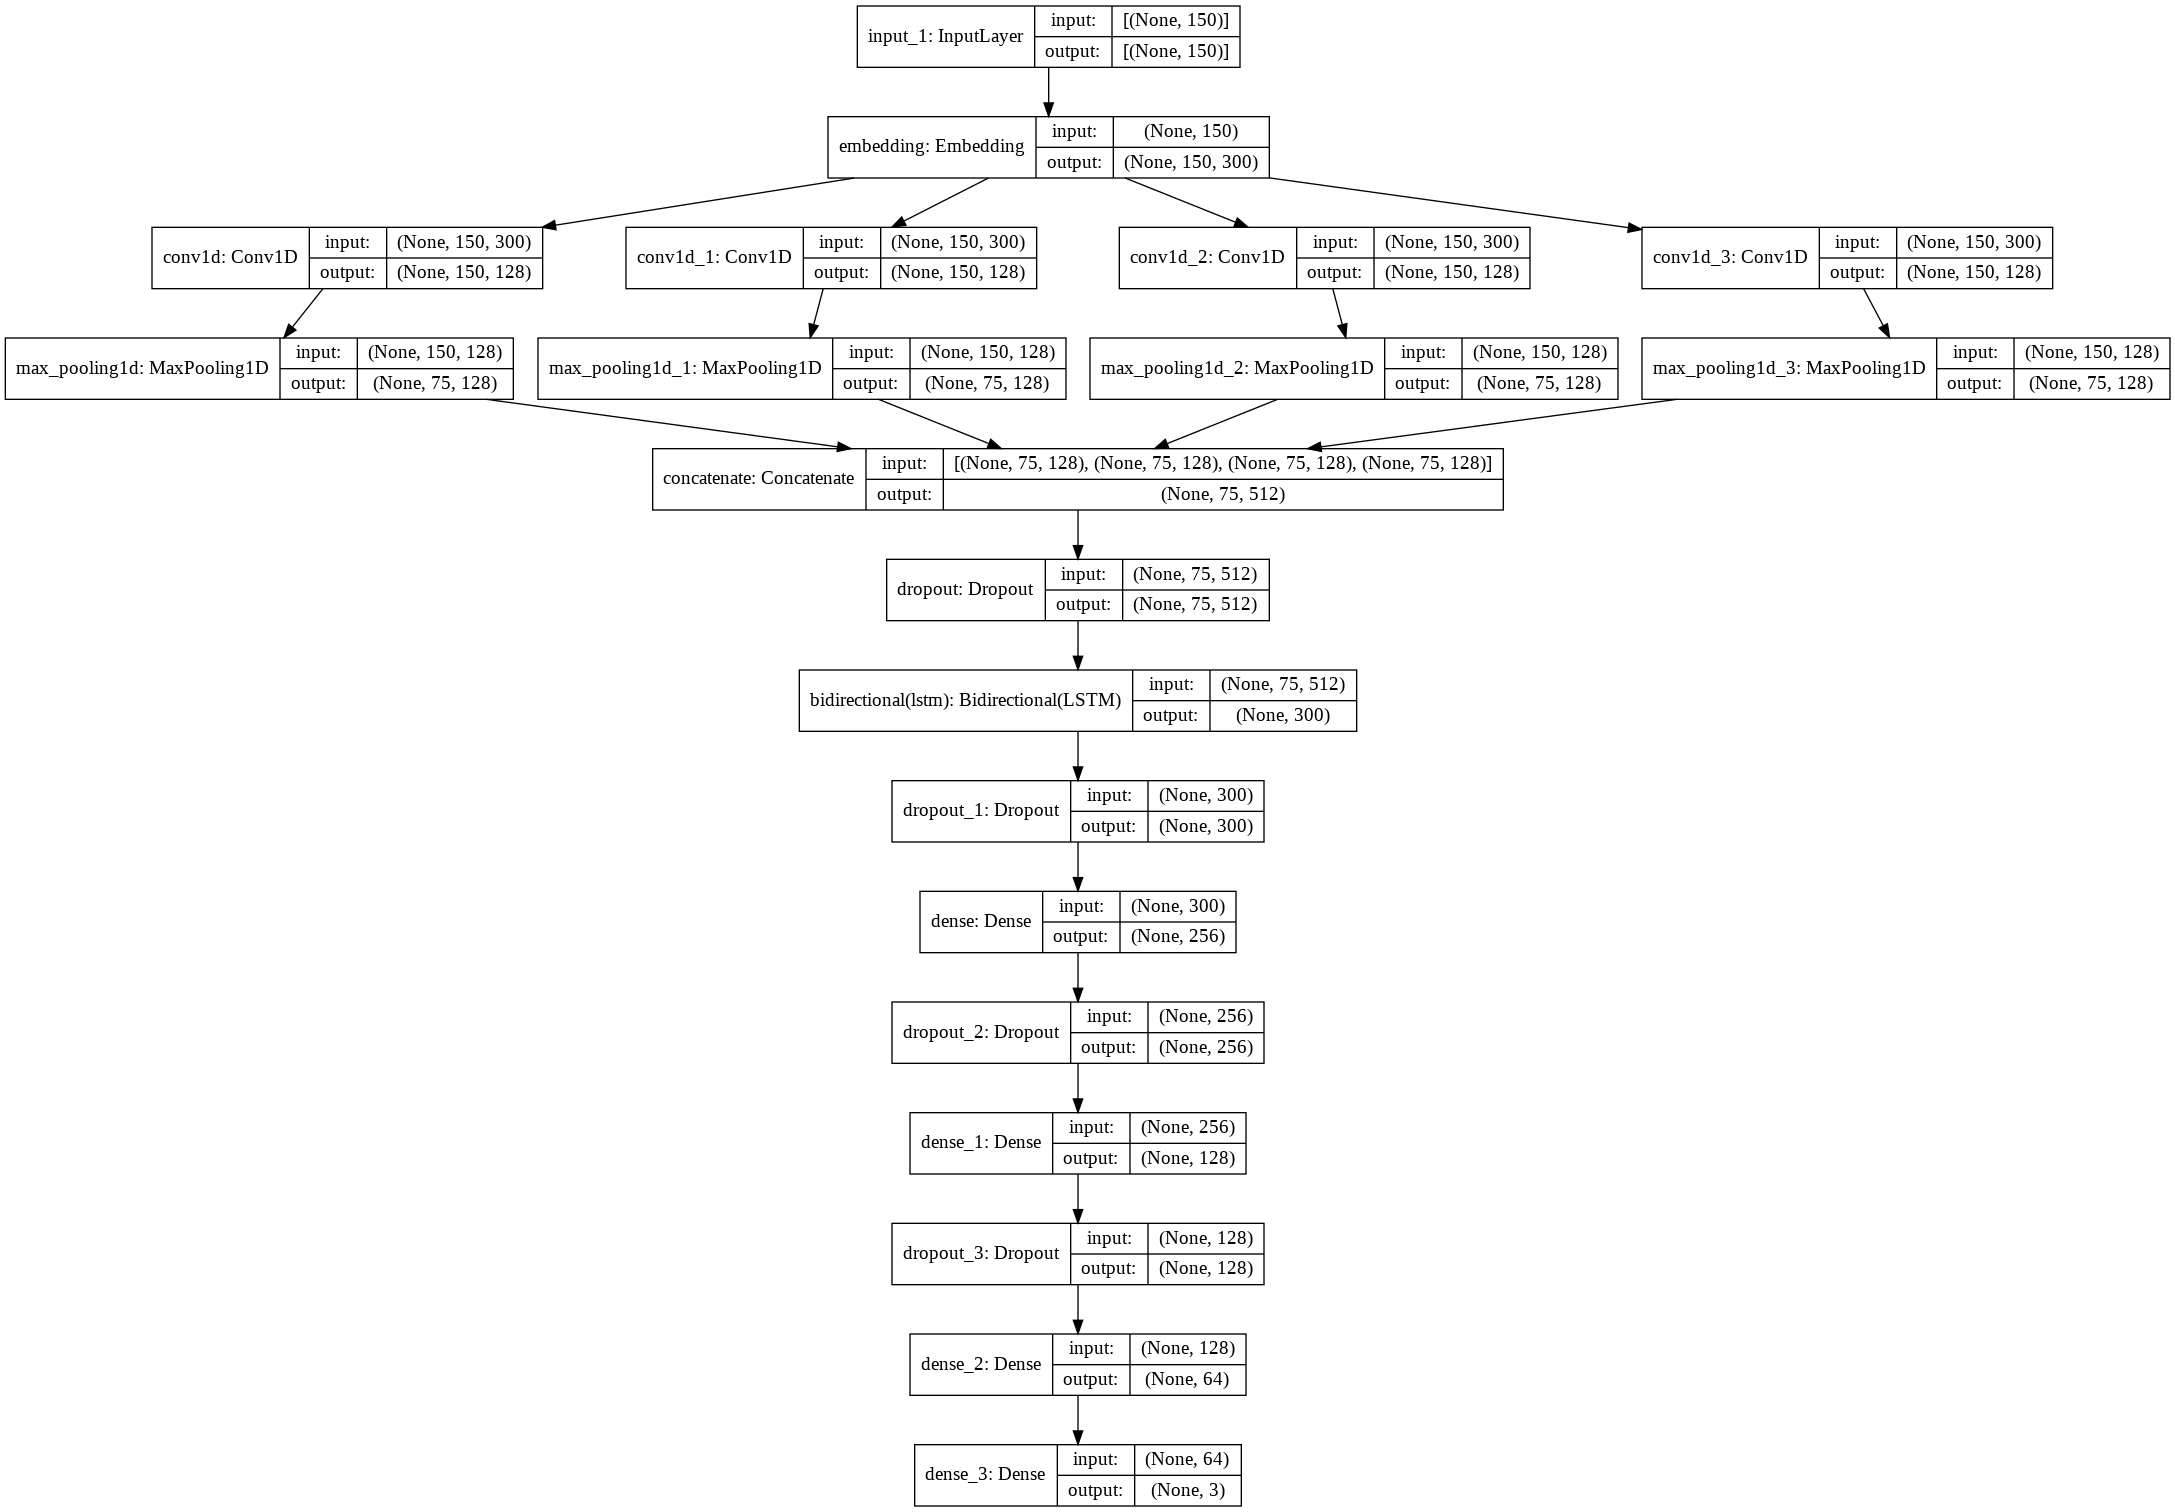

In [ ]:
plot_model(fasttext_model3, 'model3.png', show_shapes=True)

In [ ]:
reduce_lr=ReduceLROnPlateau(monitor='val_loss', factor=0.9,patience=1, verbose=0) # reducing the learning rate by 10% if the metric does not improve for each epoch

customMetrics=MetricsCustom((padded_text,y_train),(padded_text_cv,y_cv),threshold=0.5,save_as='fasttext_model3.hdf5') # Creating a class object for customMetrics class

callback_list=[reduce_lr,customMetrics]

fasttext_model3.fit(padded_text, y_train,batch_size=16,epochs=50,validation_data=(padded_text_cv,y_cv),callbacks=callback_list)

Epoch 1/50
417/417 [==============================] - 11s 17ms/step - loss: 2.1486 - val_loss: 2.2396
  -f1_score : 0.2128  -val_f1_score : 0.2416 
Epoch 2/50
417/417 [==============================] - 6s 15ms/step - loss: 2.1164 - val_loss: 2.1645
  -f1_score : 0.3421  -val_f1_score : 0.3425 
Epoch 3/50
417/417 [==============================] - 6s 15ms/step - loss: 2.1028 - val_loss: 2.1640
  -f1_score : 0.3418  -val_f1_score : 0.3432 
Epoch 4/50
417/417 [==============================] - 6s 16ms/step - loss: 2.0665 - val_loss: 2.0244
  -f1_score : 0.4839  -val_f1_score : 0.4932 
Epoch 5/50
417/417 [==============================] - 7s 16ms/step - loss: 2.0350 - val_loss: 1.9932
  -f1_score : 0.5158  -val_f1_score : 0.5127 
Epoch 6/50
417/417 [==============================] - 6s 15ms/step - loss: 2.0110 - val_loss: 2.0023
  -f1_score : 0.4848  -val_f1_score : 0.4845 
Epoch 7/50
417/417 [==============================] - 7s 16ms/step - loss: 1.9270 - val_loss: 1.9236
  -f1_score : 0.

In [ ]:
fasttext_model3.load_weights('fasttext_model3.hdf5')

In [ ]:
model2_f1=get_f1_score(fasttext_model3,padded_text_test,y_test,0.5)
print('F1-macro : ',model2_f1)
results.loc[len(results.index)]=['CNN-LSTM','Fasttext',model2_f1]

F1-macro :  0.6550014756418332


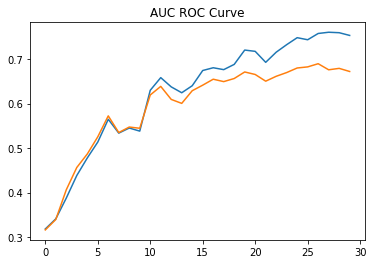

In [ ]:
train_f1=customMetrics.f1_score_train
val_f1=customMetrics.f1_score_val
plt.plot(range(len(train_f1)),train_f1)
plt.plot(range(len(val_f1)),val_f1)
plt.title('AUC ROC Curve')
plt.show()

In [ ]:
tf.keras.backend.clear_session() 
tf.get_logger().setLevel('INFO')
tf.random.set_seed(42)
glove_model3=get_model3(embedding_matrix_glove)
glove_model3.compile(optimizer=tf.keras.optimizers.Adam(1e-03,clipvalue=0.5),loss=loss_fn)

reduce_lr=ReduceLROnPlateau(monitor='val_loss', factor=0.9,patience=1, verbose=0) # reducing the learning rate by 10% if the metric does not improve for each epoch

customMetrics=MetricsCustom((padded_text,y_train),(padded_text_cv,y_cv),threshold=0.5,save_as='glove_model3.hdf5') # Creating a class object for customMetrics class

callback_list=[reduce_lr,customMetrics]

glove_model3.fit(padded_text, y_train,batch_size=16,epochs=30,validation_data=(padded_text_cv,y_cv),callbacks=callback_list)

Epoch 1/30
417/417 [==============================] - 11s 17ms/step - loss: 2.2032 - val_loss: 2.3299
  -f1_score : 0.3410  -val_f1_score : 0.3417 
Epoch 2/30
417/417 [==============================] - 6s 15ms/step - loss: 2.1223 - val_loss: 2.1163
  -f1_score : 0.3818  -val_f1_score : 0.3973 
Epoch 3/30
417/417 [==============================] - 6s 15ms/step - loss: 2.0652 - val_loss: 2.1007
  -f1_score : 0.3576  -val_f1_score : 0.3582 
Epoch 4/30
417/417 [==============================] - 6s 15ms/step - loss: 2.0196 - val_loss: 2.0017
  -f1_score : 0.4723  -val_f1_score : 0.4753 
Epoch 5/30
417/417 [==============================] - 6s 16ms/step - loss: 1.9794 - val_loss: 1.8506
  -f1_score : 0.5489  -val_f1_score : 0.5310 
Epoch 6/30
417/417 [==============================] - 6s 16ms/step - loss: 1.8685 - val_loss: 1.8500
  -f1_score : 0.4630  -val_f1_score : 0.4723 
Epoch 7/30
417/417 [==============================] - 6s 15ms/step - loss: 1.8109 - val_loss: 1.7208
  -f1_score : 0.

In [ ]:
glove_model3.load_weights('glove_model3.hdf5')

In [ ]:
model2_f1=get_f1_score(glove_model3,padded_text_test,y_test,0.5)
print('F1-macro : ',model2_f1)
results.loc[len(results.index)]=['CNN-LSTM','Glove',model2_f1]

F1-macro :  0.635515303268368


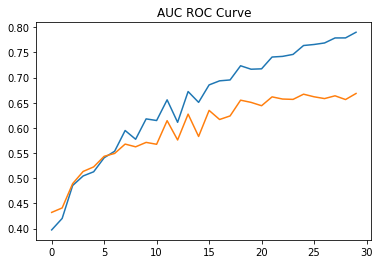

In [ ]:
train_f1=customMetrics.f1_score_train
val_f1=customMetrics.f1_score_val
plt.plot(range(len(train_f1)),train_f1)
plt.plot(range(len(val_f1)),val_f1)
plt.title('AUC ROC Curve')
plt.show()

In [ ]:
results[results['F1-Macro']>0.62]

,Model,Word Embeddings,F1-Macro
4,Logistic Regression,Fasttext,0.625004
6,Logistic Regression,Glove,0.628886
10,SVM,Glove,0.631659
24,LightGBM,Glove,0.639473
25,Stacking Classifier,Glove,0.639473
26,CNN,Fasttext,0.663417
27,CNN,Glove,0.660763
29,LSTM,Glove,0.663959
30,CNN-LSTM,Fasttext,0.655001
31,CNN-LSTM,Glove,0.635515
